# 목표 : 카테고리 변수까지 고려한 모델링!

- ver1 에서 못다룬 변수들 다룬다

In [1]:
pwd

'/mnt/sda1/myeonggyulee/myeonggyulee/uplift/2020_0113'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import glob
import os

import pickle
import datetime

%matplotlib inline

In [3]:
import multiprocessing

In [4]:
pd.__version__

'1.0.1'

In [5]:
scipy.__version__

'1.4.1'

In [6]:
np.__version__

'1.18.1'

In [7]:
import pylift

/home/wmind2/.conda/envs/myeonggyulee/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/wmind2/.conda/envs/myeonggyulee/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from collections import Counter

In [10]:
import featexp

In [11]:
pwd

'/mnt/sda1/myeonggyulee/myeonggyulee/uplift/2020_0113'

In [12]:
glob.glob('../**')

['../Untitled.ipynb', '../2020_0113', '../uplift_1205.ipynb']

In [13]:
pd.set_option('display.max_columns', 500)



---



---



# 1. 데이터 로드
- numeric 요약본 데이터 load ( 0211변수조합_모델링_실험8.ipynb 참고 ) 
- categorical 데이터 load

In [14]:
data_ = pd.read_csv('ver5_0203_trendcorr/trend_300_reduced_data_0214.csv')

In [15]:
data_.head()

,start_date,result_buy_yn,cont_group,buy_cnt_payment_3day,text_mail_wemakepay - refund_rate,text_mail_wemakepay - wmp_pick_click,ratio_spc / wmp_stay_avg,rgt_elapsed_days cart_category_cnt uv_cnt,text_mail_wemakepay search_cnt,buy_cnt_payment_3day dt_cnt_last_buy uv_cnt,buy_period cate_buy_cnt dt_cnt_last_buy,click_cnt / wmp_stay_avg,dt_cnt_last_buy refund_rate wmp_freq,ratio_spc wmp_pick_click rgt_elapsed_days,search_cnt / wmp_pick_click,dt_cnt_last_buy wmp_freq text_mail_wemakepay,ratio_spc^2 rgt_elapsed_days,buy_cnt_payment text_mail_wemakepay click_cnt,buy_cnt_date refund_rate rgt_elapsed_days,cate_rate refund_rate search_cnt,dt_cnt_last_buy refund_rate search_cnt,buy_cnt_payment text_mail_wemakepay search_cnt,buy_cnt_payment_3day - ratio_spc,cart_cnt / wmp_stay_avg,text_mail_wemakepay click_cnt search_cnt,buy_amount_avg click_cnt,dt_cnt_last_buy refund_rate click_cnt,ratio_spc - buy_cnt_payment_3day,search_cnt - uv_cnt,buy_cnt_date coupon_use_rate wmp_freq,ratio_spc search_cnt^2,buy_period^2 coupon_use_rate,coupon_use_rate dt_cnt_last_buy rgt_elapsed_days,click_cnt search_cnt,buy_cnt_payment + dt_cnt_last_buy,buy_cnt_payment_3day.1,buy_cnt_payment_3day^2,buy_cnt_payment_3day^3,cart_cnt - uv_cnt,cate_rate wmp_freq rgt_elapsed_days,text_mail_wemakepay search_cnt^2,buy_amount_avg click_cnt search_cnt,dt_cnt_last_buy wmp_freq click_cnt,cate_buy_cnt + search_cnt,buy_amount_3day ratio_spc^2,uv_cnt / cate_rate,wmp_pick_click - search_cnt,buy_cnt_date search_cnt^2,wmp_freq - cart_cnt,buy_cnt_date wmp_pick_click search_cnt,cart_buy_cnt - wmp_freq,cate_rate buy_amount_3day refund_rate,wmp_pick_click search_cnt cart_buy_cnt,refund_rate search_cnt
0,2019-11-20,1,0,3,-9,-3,0.128571,2014650.0,168.0,990.0,396.0,24.142857,1056.0,14985.0,16.8,192.0,2697.30,19604.0,1465200.0,32340.0,5544.0,9744.0,2.1,8.571429,28392.0,3235843.0,11154.0,-2.1,29,26240.0,6350.4,1476.0,819180.0,14196.0,64.0,3.0,9.0,27.0,5,1864800.0,14112.0,271810812.0,16224.0,95.0,55890.0,1.571429,-79,282240.0,-44.0,16800.0,14.0,26565000.0,12600.0,924.0
1,2019-11-14,0,1,1,3,3,-0.500000,13296.0,-2.0,712.0,31684.0,3.000000,-890.0,3324.0,1.0,1780.0,3324.00,24.0,-6648.0,50.0,178.0,-4.0,2.0,0.500000,-12.0,59400.0,-1068.0,-2.0,-5,500.0,-1.0,1584200.0,29583600.0,-6.0,180.0,1.0,1.0,1.0,-3,831000.0,2.0,-59400.0,5340.0,0.0,27500.0,0.080000,0,2.0,4.0,2.0,-3.0,-1375000.0,2.0,1.0
2,2019-11-14,0,0,1,3,3,0.066667,9972.0,44.0,108.0,1296.0,12.666667,-108.0,-664.8,-22.0,216.0,132.96,1140.0,-36564.0,-440.0,-792.0,660.0,0.8,0.333333,1672.0,620502.0,-1368.0,-0.8,19,660.0,96.8,25920.0,2393280.0,836.0,51.0,1.0,1.0,1.0,-2,199440.0,968.0,13651044.0,4104.0,23.0,472.0,0.150000,-23,5324.0,2.0,-242.0,1.0,-236000.0,-88.0,-22.0
3,2019-11-11,0,1,1,-31,1,-1.000000,199260.0,50.0,70.0,1470.0,-45.000000,1386.0,3321.0,25.0,84.0,3321.00,720.0,657558.0,49500.0,5775.0,400.0,0.0,-6.000000,2250.0,547065.0,10395.0,0.0,15,1368.0,625.0,186200.0,883386.0,1125.0,15.0,1.0,1.0,1.0,-4,1195560.0,1250.0,13676625.0,1890.0,28.0,5000.0,0.166667,-24,3750.0,0.0,150.0,-1.0,9900000.0,125.0,825.0
4,2019-11-12,0,1,2,-5,3,0.266667,2046352.0,100.0,3472.0,3906.0,40.666667,6727.0,-2657.6,-50.0,1922.0,2126.08,16836.0,1139446.0,14000.0,10850.0,6900.0,1.2,37.333333,12200.0,1950902.0,26474.0,-1.2,-6,25823.0,2000.0,833.0,1750694.0,6100.0,100.0,2.0,4.0,8.0,56,4119280.0,5000.0,97545100.0,117242.0,68.0,11968.0,1.400000,-51,122500.0,-81.0,-2450.0,11.0,5236000.0,-2100.0,350.0


In [16]:
data_.shape

(419554, 54)

In [17]:
# 사용할 변수들 추린다
numeric_features = ['start_date', 'result_buy_yn', 'cont_group', 
                     'ratio_spc / wmp_stay_avg', 'text_mail_wemakepay search_cnt', 'buy_cnt_payment_3day dt_cnt_last_buy uv_cnt', 
                     'buy_period cate_buy_cnt dt_cnt_last_buy', 'dt_cnt_last_buy wmp_freq text_mail_wemakepay']

In [18]:
data_numeric = data_[numeric_features].copy()

---

In [19]:
# categorical 데이터
data_cate = pd.read_csv('data_cate_0207.csv')

In [20]:
data_cate.head()

,start_date,result_buy_yn,cont_group,m_id,text_yn,push_yn,mail_yn,buying_trend_group,buy_ep_yn_3day,visit_gubn,last_buy_seg,last_buy_platform,wmp_pay_yn,referral_flag,order_route,buy_amount_avg_all_seg,rgt_elapsed_days_seg,cate_main_buy_,text_mail_wemakepay_bool,text_mail_wemakepay,birth,ad_uv_yn,cate_main_buy,buy_cate_3day
0,2019-11-20,1,0,1000298,1,0,1,stable,N,O,D-2,APP,0,outside,best,1,5,3,0,2,30,1,신선식품,legacy
1,2019-11-14,0,1,1000347,1,0,1,stable,Y,R,D-1,MWEB,0,outside,else,1,5,11,0,2,30,1,various,바디/헤어
2,2019-11-14,0,0,1000571,1,1,1,long,N,O,D-1,APP,0,inside,else,1,5,11,0,2,40,1,various,legacy
3,2019-11-11,0,1,1001894,1,0,1,short,N,O,D-3,APP,0,direct,else,1,5,2,0,2,30,1,화장지/물티슈/생리대,클렌징/필링
4,2019-11-12,0,1,1002503,1,0,1,stable,N,O,D-1,PC,0,outside,special,1,5,3,0,2,80,1,신선식품,신선식품


In [21]:
data_cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419554 entries, 0 to 419553
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   start_date                419554 non-null  object
 1   result_buy_yn             419554 non-null  int64 
 2   cont_group                419554 non-null  int64 
 3   m_id                      419554 non-null  int64 
 4   text_yn                   419554 non-null  int64 
 5   push_yn                   419554 non-null  int64 
 6   mail_yn                   419554 non-null  int64 
 7   buying_trend_group        419554 non-null  object
 8   buy_ep_yn_3day            419554 non-null  object
 9   visit_gubn                419554 non-null  object
 10  last_buy_seg              419554 non-null  object
 11  last_buy_platform         419554 non-null  object
 12  wmp_pay_yn                419554 non-null  int64 
 13  referral_flag             419554 non-null  object
 14  orde

In [22]:
# monday : 0 ~ sunday : 6
pd.to_datetime(data_cate['start_date']).dt.weekday

0         2
1         3
2         3
3         0
4         1
         ..
419549    4
419550    4
419551    4
419552    4
419553    4
Name: start_date, Length: 419554, dtype: int64

In [23]:
data_cate['weekday'] = pd.to_datetime(data_cate['start_date']).dt.weekday

In [24]:
data_cate.head()

,start_date,result_buy_yn,cont_group,m_id,text_yn,push_yn,mail_yn,buying_trend_group,buy_ep_yn_3day,visit_gubn,last_buy_seg,last_buy_platform,wmp_pay_yn,referral_flag,order_route,buy_amount_avg_all_seg,rgt_elapsed_days_seg,cate_main_buy_,text_mail_wemakepay_bool,text_mail_wemakepay,birth,ad_uv_yn,cate_main_buy,buy_cate_3day,weekday
0,2019-11-20,1,0,1000298,1,0,1,stable,N,O,D-2,APP,0,outside,best,1,5,3,0,2,30,1,신선식품,legacy,2
1,2019-11-14,0,1,1000347,1,0,1,stable,Y,R,D-1,MWEB,0,outside,else,1,5,11,0,2,30,1,various,바디/헤어,3
2,2019-11-14,0,0,1000571,1,1,1,long,N,O,D-1,APP,0,inside,else,1,5,11,0,2,40,1,various,legacy,3
3,2019-11-11,0,1,1001894,1,0,1,short,N,O,D-3,APP,0,direct,else,1,5,2,0,2,30,1,화장지/물티슈/생리대,클렌징/필링,0
4,2019-11-12,0,1,1002503,1,0,1,stable,N,O,D-1,PC,0,outside,special,1,5,3,0,2,80,1,신선식품,신선식품,1


In [25]:
cate_features = data_cate.drop(columns = ['start_date', 'result_buy_yn', 'cont_group', 'm_id']).columns.tolist()

In [26]:
len(cate_features)

21

---
---

# 2. 모델링


### ### 카테고리 변수 추가된 후보 모델 정의
- cate_step1 = ['referral_flag', 'order_route', 'buy_ep_yn_3day', 'cate_main_buy', 'cate_main_buy_', 'buy_cate_3day', 'weekday']
- cate_step2 = ['']

In [27]:
data_numeric.shape

(419554, 8)

In [28]:
# 1차
cate_step1 = ['referral_flag', 'order_route', 'buy_ep_yn_3day', 'cate_main_buy', 'cate_main_buy_', 'buy_cate_3day', 'weekday']

In [29]:
# 나머지 변수들 - 2차
list( set(cate_features) - set(cate_step1) )

['buy_amount_avg_all_seg',
 'rgt_elapsed_days_seg',
 'visit_gubn',
 'text_mail_wemakepay_bool',
 'birth',
 'push_yn',
 'mail_yn',
 'buying_trend_group',
 'wmp_pay_yn',
 'last_buy_platform',
 'ad_uv_yn',
 'text_yn',
 'last_buy_seg',
 'text_mail_wemakepay']

In [30]:
cate_step2 = list( set(cate_features) - set(cate_step1) )

In [31]:
len(cate_step2)

14

In [32]:
fin_candidate_list = []

for i in range(len(cate_step2) + 1):
    # base가 가장 마지막에 오도록
    if i == len(cate_step2):
        fin_candidate_list.append( data_numeric )
    else:
        fin_candidate_list.append( pd.concat([data_numeric , pd.get_dummies( data_cate[cate_step2[i]] ) ], axis=1) )

In [33]:
len(fin_candidate_list)

15

In [34]:
cate_step2[0]

'buy_amount_avg_all_seg'

In [35]:
fin_candidate_list[0].head()

,start_date,result_buy_yn,cont_group,ratio_spc / wmp_stay_avg,text_mail_wemakepay search_cnt,buy_cnt_payment_3day dt_cnt_last_buy uv_cnt,buy_period cate_buy_cnt dt_cnt_last_buy,dt_cnt_last_buy wmp_freq text_mail_wemakepay,0,1,2,3,4,5
0,2019-11-20,1,0,0.128571,168.0,990.0,396.0,192.0,0,1,0,0,0,0
1,2019-11-14,0,1,-0.500000,-2.0,712.0,31684.0,1780.0,0,1,0,0,0,0
2,2019-11-14,0,0,0.066667,44.0,108.0,1296.0,216.0,0,1,0,0,0,0
3,2019-11-11,0,1,-1.000000,50.0,70.0,1470.0,84.0,0,1,0,0,0,0
4,2019-11-12,0,1,0.266667,100.0,3472.0,3906.0,1922.0,0,1,0,0,0,0


In [36]:
fin_candidate_list[14].head()

,start_date,result_buy_yn,cont_group,ratio_spc / wmp_stay_avg,text_mail_wemakepay search_cnt,buy_cnt_payment_3day dt_cnt_last_buy uv_cnt,buy_period cate_buy_cnt dt_cnt_last_buy,dt_cnt_last_buy wmp_freq text_mail_wemakepay
0,2019-11-20,1,0,0.128571,168.0,990.0,396.0,192.0
1,2019-11-14,0,1,-0.500000,-2.0,712.0,31684.0,1780.0
2,2019-11-14,0,0,0.066667,44.0,108.0,1296.0,216.0
3,2019-11-11,0,1,-1.000000,50.0,70.0,1470.0,84.0
4,2019-11-12,0,1,0.266667,100.0,3472.0,3906.0,1922.0


---
---

# 후보들의 비교
- ( ***주목 ) : multiprocessing 고쳤다!

In [37]:
len(fin_candidate_list)

15

### - 20일

In [38]:
len(fin_candidate_list)

15

In [38]:
# test : 20일

data_input_list = []

for i, candidate_ in enumerate(fin_candidate_list):
    train_ =  candidate_[candidate_.start_date < '2019-11-20'].drop(columns = ['start_date']) 
    test_ = candidate_[candidate_.start_date == '2019-11-20'].drop(columns = ['start_date'])
    
    data_input_list.append( (train_, test_) )
    


In [39]:
default_parameters = {'base_score':0.5, 'booster':'gbtree', 'colsample_bylevel':1,
             'colsample_bynode':1, 'colsample_bytree':1, 'gamma':0,
             'importance_type':'gain', 'learning_rate':0.1, 'max_delta_step':0,
             'max_depth':3, 'min_child_weight':1, 'missing':None, 'n_estimators':100,
             'n_jobs':1, 'num_parallel_tree':1, 'objective':'reg:squarederror',
             'random_state':0, 'reg_alpha':0, 'reg_lambda':1, 'scale_pos_weight':1,
             'subsample':1, 'tree_method':'auto', 'verbosity':1}

#### (1) n_estimators : 100 (multiprocessing)

In [40]:
def parallelize_dataframe(df_split, func):
    
    pool = multiprocessing.Pool( num_cores )
    stats_list = pool.map(func, df_split) # 리스트 형태로 떨궈준다
    pool.close()
    pool.join()
    print('parallel finished !')
    return stats_list

In [41]:
def make_model( data_input ):
    
    
    up = pylift.TransformedOutcome( data_input , col_treatment='cont_group', col_outcome='result_buy_yn' )
    up.fit( ** default_parameters )
    
    model_save = pickle.dumps(up)
    return model_save

In [45]:
%%time

### error_mse 구했다

num_cores = len( data_input_list )  # 

# df_split은 위에 정의했다
data_parallel = parallelize_dataframe( data_input_list , make_model )

parallel finished !
CPU times: user 3.08 s, sys: 3.82 s, total: 6.9 s
Wall time: 46.1 s


In [51]:
# 모델 저장!

uplift_model_20 = {}
for i in range(len(data_parallel)):
    uplift_model_20[i] = pickle.loads(data_parallel[i])

In [52]:
len(uplift_model_20)

15

---

In [53]:
len(uplift_model_20)

15

In [54]:
uplift_model_20.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

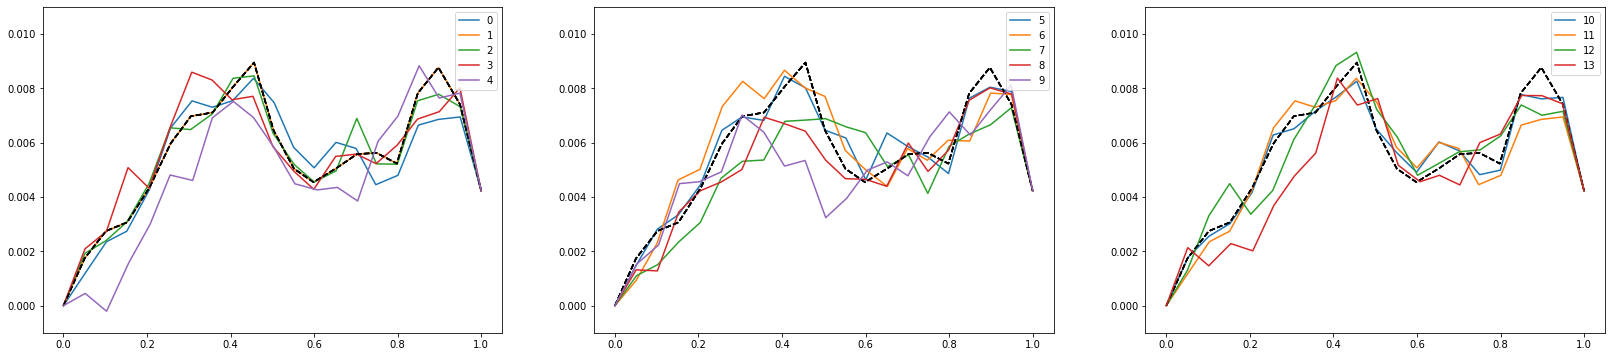

In [55]:
# 시각화 1


fig, axes = plt.subplots(nrows=1, ncols = 3, figsize = (28, 6))

# base는 따로 빼고 그려줘
uplift_model_base = uplift_model_20[14]

for i in range(len(uplift_model_20)-1 ):
    if i < 5 :
        # base
        axes[0].plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , color='black', linestyle='dashed')
        # 후보모델
        axes[0].plot(uplift_model_20[i].test_results_.aqini_x,  uplift_model_20[i].test_results_.aqini_y , label = i )
    elif i < 10 :
        # base
        axes[1].plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , color='black', linestyle='dashed' )
        # 후보모델
        axes[1].plot(uplift_model_20[i].test_results_.aqini_x,  uplift_model_20[i].test_results_.aqini_y , label = i )
    else:
        # base
        axes[2].plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , color='black', linestyle='dashed' )
        # 후보모델
        axes[2].plot(uplift_model_20[i].test_results_.aqini_x,  uplift_model_20[i].test_results_.aqini_y , label = i )
        
axes[0].set_ylim(-0.001, 0.011)
axes[0].legend(loc="upper right")
axes[1].set_ylim(-0.001, 0.011)
axes[1].legend(loc="upper right")
axes[2].set_ylim(-0.001, 0.011)
axes[2].legend(loc="upper right")


plt.legend()
plt.show()
plt.close()

In [56]:
cate_step2

['text_mail_wemakepay',
 'ad_uv_yn',
 'buying_trend_group',
 'last_buy_platform',
 'push_yn',
 'visit_gubn',
 'last_buy_seg',
 'birth',
 'mail_yn',
 'buy_amount_avg_all_seg',
 'wmp_pay_yn',
 'text_mail_wemakepay_bool',
 'rgt_elapsed_days_seg',
 'text_yn']

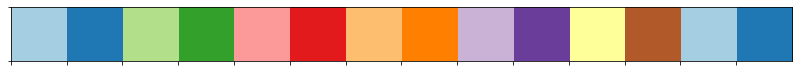

In [57]:
sns.palplot(sns.color_palette("Paired", 14)) # index-12/13 중복 

In [59]:
cmap = sns.color_palette("Paired", 14)

In [126]:
len(cmap)

13

In [127]:
cmap[0]

(0.6509803921568628, 0.807843137254902, 0.8901960784313725)

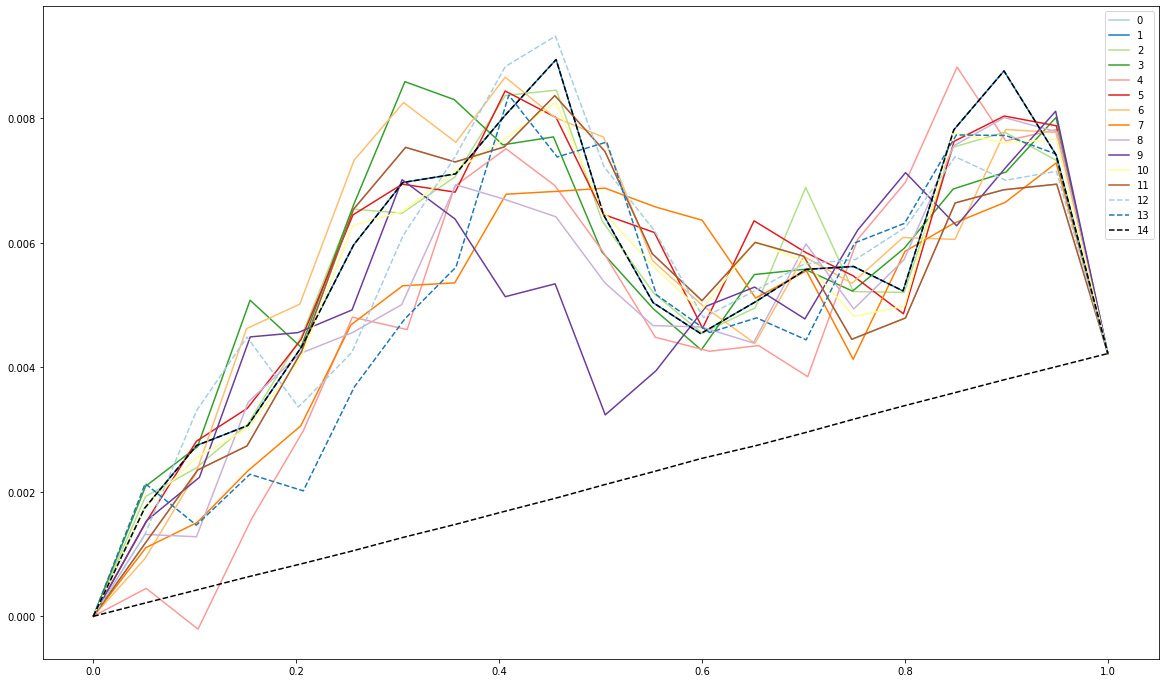

In [60]:
plt.figure(figsize = (20, 12))

for i in range(len(uplift_model_20)):
    
    if i == 14:
        # 마지막이라면, base 모델 그려주고
        plt.plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , label = i, color = 'black', linestyle='dashed' )
        plt.plot(uplift_model_20[i].test_results_.aqini_x,  [uplift_model_20[i].test_results_.aqini_y[-1]/20*x for x in range(20+1)], color='black', linestyle='dashed')
    elif i == 12 or i == 13:
        plt.plot(uplift_model_20[i].test_results_.aqini_x,  uplift_model_20[i].test_results_.aqini_y , label = i, color = cmap[i], linestyle = 'dashed')
        
    else:
        plt.plot(uplift_model_20[i].test_results_.aqini_x,  uplift_model_20[i].test_results_.aqini_y , label = i, color = cmap[i])
   

plt.legend()
plt.show()
plt.close()

In [61]:
len(uplift_model_20) + 1

16

In [62]:
axes[0]

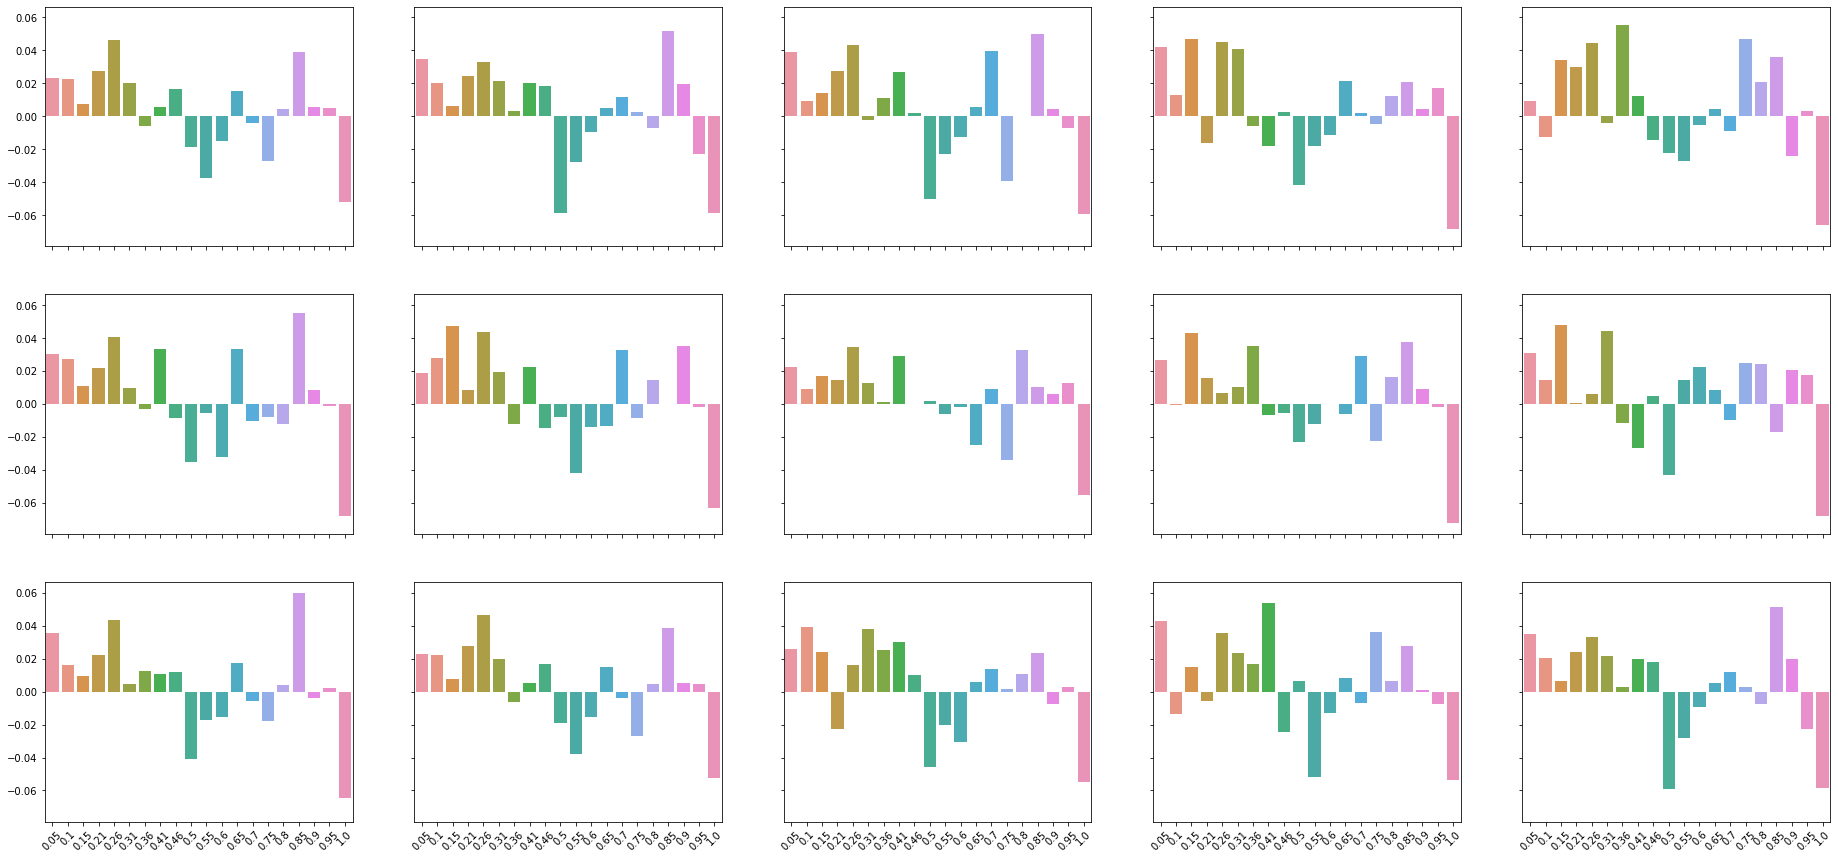

In [62]:
# 후보 35
fig, axes = plt.subplots(nrows = 3, ncols = 5, sharey = True, sharex=True, figsize = (32, 15))

axes = axes.flatten()

for i in range(len(uplift_model_20) ):
    if i == len(uplift_model_20): # 마지막에 base 그려준다
        sns.barplot(np.around(uplift_model_base.test_results_.uplift_x, 2), uplift_model_base.test_results_.uplift_y, ax = axes[i])
    else:
        sns.barplot(np.around(uplift_model_20[i].test_results_.uplift_x, 2), uplift_model_20[i].test_results_.uplift_y, ax = axes[i])

for ax in axes:
    ax.tick_params('x', labelrotation=45)
plt.show()
plt.close()

---

### ### q1_aqini

In [63]:
cate_step2

['text_mail_wemakepay',
 'ad_uv_yn',
 'buying_trend_group',
 'last_buy_platform',
 'push_yn',
 'visit_gubn',
 'last_buy_seg',
 'birth',
 'mail_yn',
 'buy_amount_avg_all_seg',
 'wmp_pay_yn',
 'text_mail_wemakepay_bool',
 'rgt_elapsed_days_seg',
 'text_yn']

In [64]:
# base
uplift_model_base.test_results_.q1_aqini

0.04418878173131571

In [69]:
# 
for i in range(len(uplift_model_20)):
    print( '{} :'.format(i), uplift_model_20[i].test_results_.q1_aqini )

0 : 0.043879443130293724
1 : 0.04418878173131571
2 : 0.044277854517129726
3 : 0.04485087584960689
4 : 0.03571196903886808
5 : 0.04513414506027497
6 : 0.046504151379468665
7 : 0.03677635913065348
8 : 0.03755490549437783
9 : 0.03721080129437166
10 : 0.043256491557405526
11 : 0.043879443130293724
12 : 0.04492503203518923
13 : 0.03862225824948153
14 : 0.04418878173131571


----

### ### 상위 50%의 uplift 기준으로 평가

In [66]:
# 상위 50% 의 uplift 값의 합을 본다 - (조건)percentile 에 따라서 다른 가중치를 갖는다!

uplift_model_half_sum = {}
for i in range(len( uplift_model_20 )):
    uplift_model_half_sum[i] = np.sum( [up_*(10-i) for i,up_ in enumerate(uplift_model_20[i].test_results_.uplift_y[:10])] )
        

In [67]:
uplift_model_half_sum

{0: 1.0658437955462159,
 1: 1.1032653043747807,
 2: 1.096295557656615,
 3: 1.155028401196639,
 4: 0.9050855448877916,
 5: 1.111296521774904,
 6: 1.212438580609731,
 7: 0.9041715468824134,
 8: 0.8897759968403705,
 9: 0.9196204888763116,
 10: 1.0814062933274777,
 11: 1.0658437955462159,
 12: 1.10109636262797,
 13: 0.9014358988474487,
 14: 1.1032653043747807}

In [68]:
pd.DataFrame(index = uplift_model_half_sum.keys(), data = uplift_model_half_sum.values(), columns = ['half_sum'] ).sort_values(by='half_sum', ascending=False)

,half_sum
6,1.212439
3,1.155028
5,1.111297
1,1.103265
14,1.103265
12,1.101096
2,1.096296
10,1.081406
0,1.065844
11,1.065844


In [71]:
uplift_model_20_upresult = pd.DataFrame(index = uplift_model_half_sum.keys(), data = uplift_model_half_sum.values(), columns = ['half_sum'] )

In [72]:
uplift_model_20_upresult.sort_values(by='half_sum', ascending=False)

,half_sum
6,1.212439
3,1.155028
5,1.111297
1,1.103265
14,1.103265
12,1.101096
2,1.096296
10,1.081406
0,1.065844
11,1.065844


---

#### (2) n_estimators : 30

In [73]:
# base가 가장 마지막에 있다.
len(data_input_list)

15

- multiprocessing

In [42]:
parameters = default_parameters.copy()
parameters.update({'n_estimators' : 30})

In [44]:
def parallelize_dataframe(df_split, func):
    
    pool = multiprocessing.Pool( num_cores )
    stats_list = pool.map(func, df_split) # 리스트 형태로 떨궈준다
    pool.close()
    pool.join()
    print('parallel finished !')
    return stats_list

In [45]:
def make_model( data_input ):
    
    
    up = pylift.TransformedOutcome( data_input , col_treatment='cont_group', col_outcome='result_buy_yn' )    
    
    up.fit( **parameters )
    
    model_save = pickle.dumps(up)
    return model_save

In [46]:
%%time

### error_mse 구했다

num_cores = len( data_input_list )  # 

# df_split은 위에 정의했다
data_parallel = parallelize_dataframe( data_input_list , make_model )

parallel finished !
CPU times: user 3.24 s, sys: 3.83 s, total: 7.08 s
Wall time: 36.5 s


In [47]:
# 모델 저장!

uplift_model_20_30 = {}
for i in range(len(data_parallel)):
    uplift_model_20_30[i] = pickle.loads(data_parallel[i])

In [49]:
len(uplift_model_20_30)

15

---

In [50]:
len( uplift_model_20_30 )

15

In [51]:
uplift_model_20_30.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [52]:
# base는 따로 빼고 그려줘
uplift_model_base = uplift_model_20_30[14]

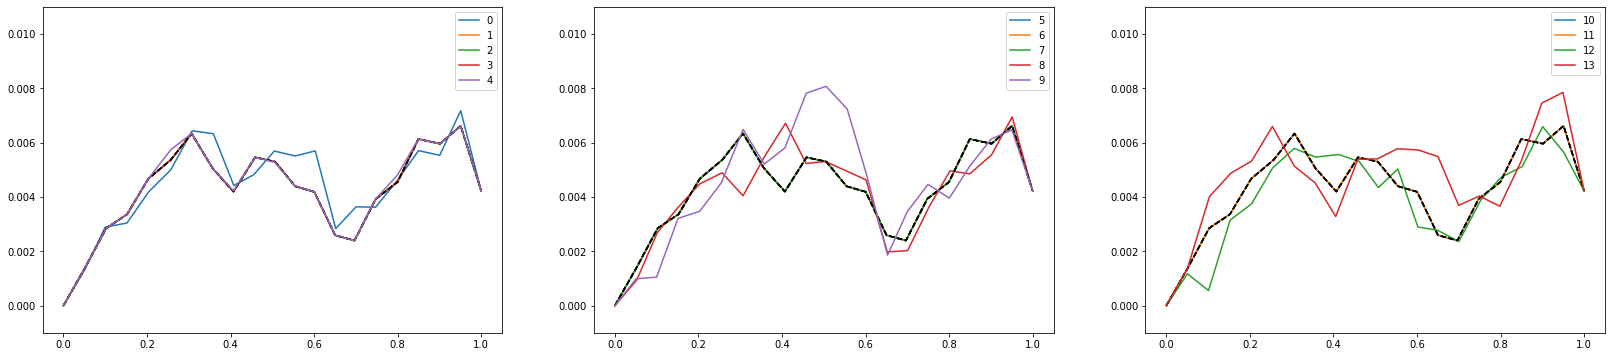

In [53]:
# 시각화 1


fig, axes = plt.subplots(nrows=1, ncols = 3, figsize = (28, 6))


# base는 따로 빼고 그려줘
for i in range(len( uplift_model_20_30 )-1 ):
    if i < 5 :
        # base
        axes[0].plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , color='black', linestyle='dashed')
        # 후보모델
        axes[0].plot(uplift_model_20_30[i].test_results_.aqini_x,  uplift_model_20_30[i].test_results_.aqini_y , label = i )
    elif i < 10 :
        # base
        axes[1].plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , color='black', linestyle='dashed' )
        # 후보모델
        axes[1].plot(uplift_model_20_30[i].test_results_.aqini_x,  uplift_model_20_30[i].test_results_.aqini_y , label = i )
    else:
        # base
        axes[2].plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , color='black', linestyle='dashed' )
        # 후보모델
        axes[2].plot(uplift_model_20_30[i].test_results_.aqini_x,  uplift_model_20_30[i].test_results_.aqini_y , label = i )
        
axes[0].set_ylim(-0.001, 0.011)
axes[0].legend(loc="upper right")
axes[1].set_ylim(-0.001, 0.011)
axes[1].legend(loc="upper right")
axes[2].set_ylim(-0.001, 0.011)
axes[2].legend(loc="upper right")


plt.legend()
plt.show()
plt.close()

In [57]:
cate_step2

['last_buy_platform',
 'buying_trend_group',
 'wmp_pay_yn',
 'mail_yn',
 'last_buy_seg',
 'text_mail_wemakepay_bool',
 'ad_uv_yn',
 'rgt_elapsed_days_seg',
 'buy_amount_avg_all_seg',
 'text_yn',
 'visit_gubn',
 'text_mail_wemakepay',
 'push_yn',
 'birth']

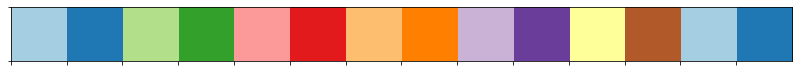

In [55]:
sns.palplot(sns.color_palette("Paired", 14))

In [56]:
cmap = sns.color_palette("Paired", 14)

In [58]:
len(cmap)

14

In [59]:
cmap[0]

(0.6509803921568628, 0.807843137254902, 0.8901960784313725)

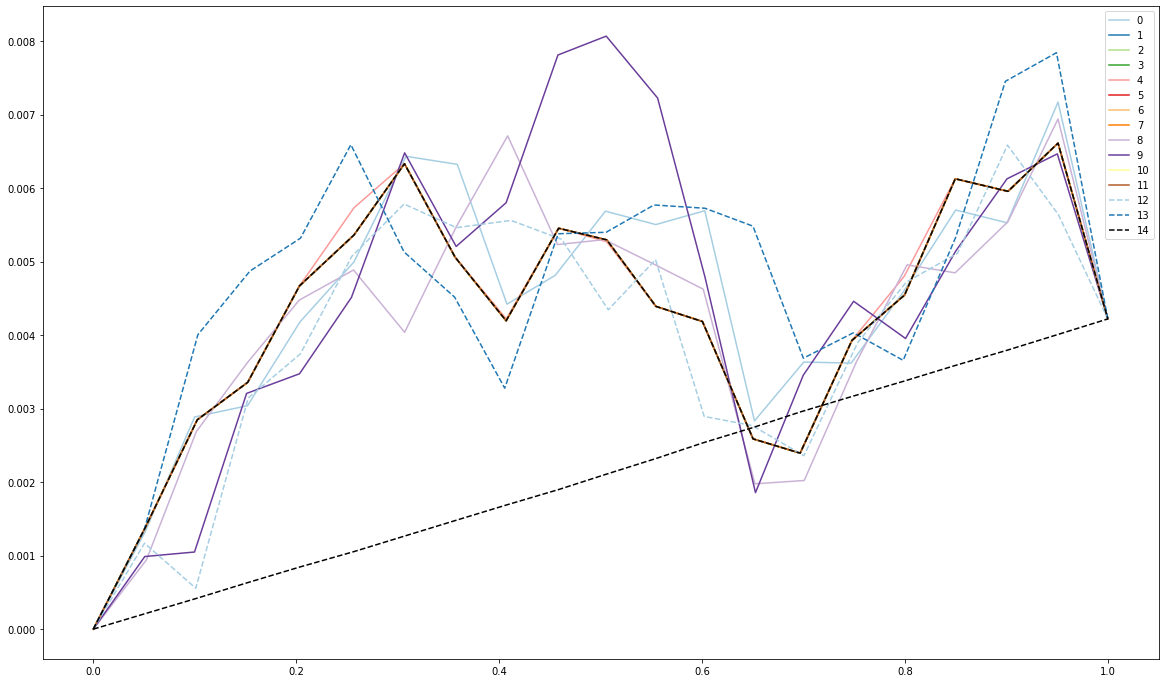

In [60]:
plt.figure(figsize = (20, 12))

for i in range(len(uplift_model_20_30)):    
    if i == 14:
        # 마지막이라면, base 모델 그려주고
        plt.plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , label = i, color = 'black', linestyle='dashed' )
        plt.plot(uplift_model_20_30[i].test_results_.aqini_x,  [uplift_model_20_30[i].test_results_.aqini_y[-1]/20*x for x in range(20+1)], color='black', linestyle='dashed')
    
    elif i == 12 or i == 13:
        plt.plot(uplift_model_20_30[i].test_results_.aqini_x,  uplift_model_20_30[i].test_results_.aqini_y , label = i, color = cmap[i], linestyle='dashed')
        
    else:
        plt.plot(uplift_model_20_30[i].test_results_.aqini_x,  uplift_model_20_30[i].test_results_.aqini_y , label = i, color = cmap[i])

plt.legend()
plt.show()
plt.close()

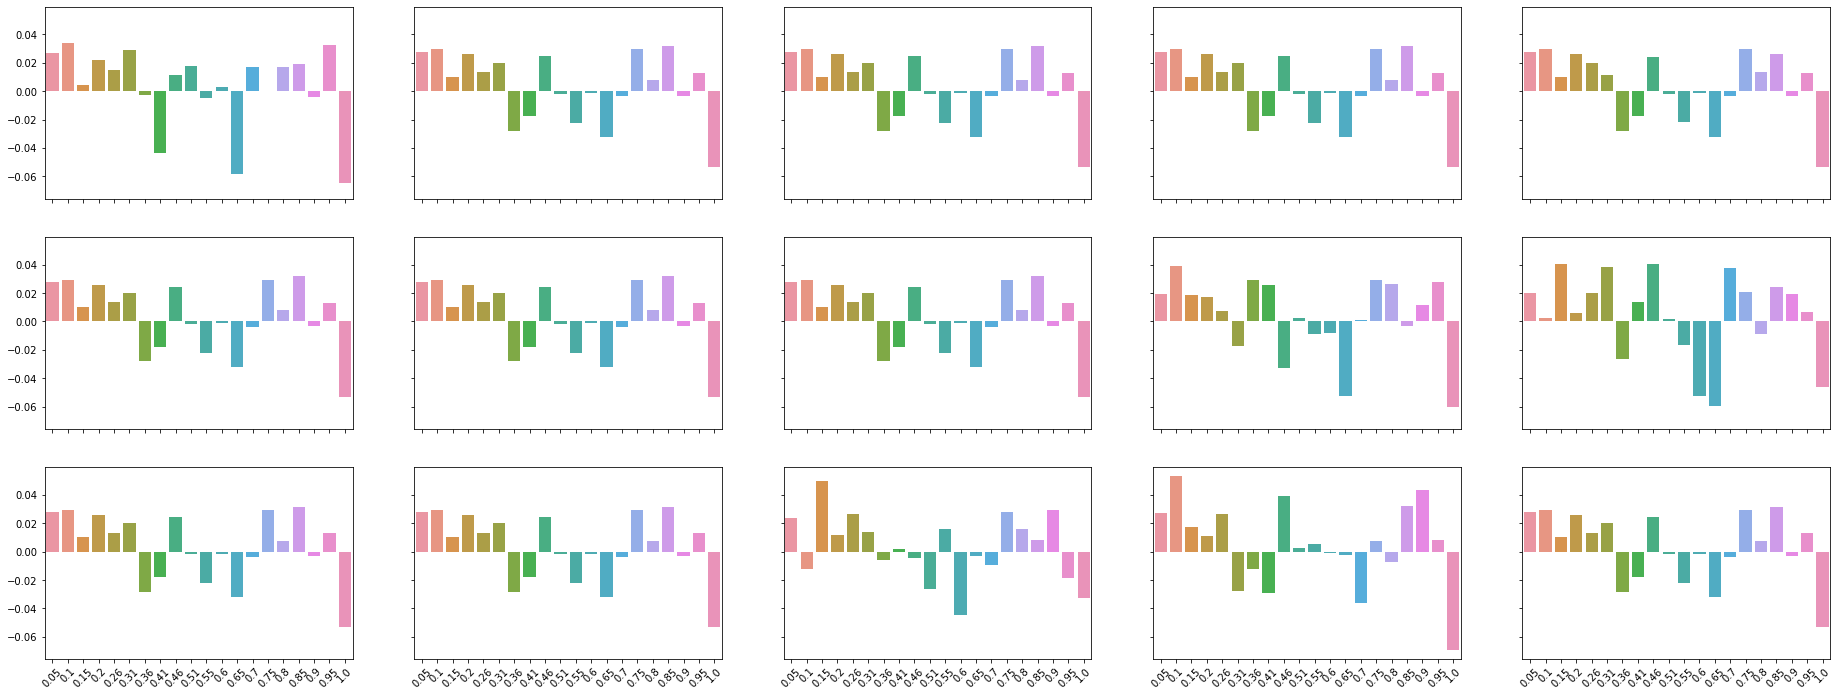

In [61]:
# 후보 35
fig, axes = plt.subplots(nrows = 3, ncols = 5, sharey = True, sharex=True, figsize = (32, 12))

axes = axes.flatten()

for i in range(len(uplift_model_20_30) ):
    if i == len(uplift_model_20_30): # 마지막에 base 그려준다
        sns.barplot(np.around(uplift_model_base.test_results_.uplift_x, 2), uplift_model_base.test_results_.uplift_y, ax = axes[i])
    else:
        sns.barplot(np.around(uplift_model_20_30[i].test_results_.uplift_x, 2), uplift_model_20_30[i].test_results_.uplift_y, ax = axes[i])

for ax in axes:
    ax.tick_params('x', labelrotation=45)
plt.show()
plt.close()

---

### ### q1_aqini

In [62]:
cate_step2

['last_buy_platform',
 'buying_trend_group',
 'wmp_pay_yn',
 'mail_yn',
 'last_buy_seg',
 'text_mail_wemakepay_bool',
 'ad_uv_yn',
 'rgt_elapsed_days_seg',
 'buy_amount_avg_all_seg',
 'text_yn',
 'visit_gubn',
 'text_mail_wemakepay',
 'push_yn',
 'birth']

In [63]:
# base
uplift_model_base.test_results_.q1_aqini

0.027945198193761178

In [64]:
# 7이 곧 base다
for i in range(len(uplift_model_20_30)):
    print( '{} :'.format(i), uplift_model_20_30[i].test_results_.q1_aqini )

0 : 0.03167682458447889
1 : 0.027945198193761178
2 : 0.027945198193761178
3 : 0.027945198193761178
4 : 0.02794988861118591
5 : 0.027945198193761178
6 : 0.027945198193761178
7 : 0.027945198193761178
8 : 0.025958109884831427
9 : 0.031400393008056325
10 : 0.027945198193761178
11 : 0.027945198193761178
12 : 0.025247943412475007
13 : 0.034926435972336155
14 : 0.027945198193761178


----

### ### 상위 50%의 uplift 기준으로 평가

In [76]:
# 상위 50% 의 uplift 값의 합을 본다 - (조건)percentile 에 따라서 다른 가중치를 갖는다!

uplift_model_20_30_half_sum = {}
for i in range(len( uplift_model_20_30 )):
    uplift_model_20_30_half_sum[i] = np.sum( [up_*(10-i) for i,up_ in enumerate(uplift_model_20_30[i].test_results_.uplift_y[:10])] )
        

In [79]:
pd.DataFrame(index = uplift_model_20_30_half_sum.keys(), data = uplift_model_20_30_half_sum.values(), columns = ['half_sum'] ).sort_values(by='half_sum', ascending=False)

,half_sum
13,0.935508
9,0.921716
8,0.900691
0,0.897715
1,0.865500
2,0.865500
3,0.865500
5,0.865500
6,0.865500
7,0.865500


In [80]:
uplift_model_20_30_upresult = pd.DataFrame(index = uplift_model_20_30_half_sum.keys(), data = uplift_model_20_30_half_sum.values(), columns = ['half_sum'] )

In [82]:
uplift_model_20_30_upresult.sort_values(by='half_sum', ascending=False)

,half_sum
13,0.935508
9,0.921716
8,0.900691
0,0.897715
1,0.865500
2,0.865500
3,0.865500
5,0.865500
6,0.865500
7,0.865500


---

#### (3) n_estimators : 300

In [73]:
# base가 가장 마지막에 있다.
len(data_input_list)

15

- multiprocessing

In [42]:
parameters = default_parameters.copy()
parameters.update({'n_estimators' : 300})

In [43]:
def parallelize_dataframe(df_split, func):
    
    pool = multiprocessing.Pool( num_cores )
    stats_list = pool.map(func, df_split) # 리스트 형태로 떨궈준다
    pool.close()
    pool.join()
    print('parallel finished !')
    return stats_list

In [44]:
def make_model( data_input ):
    
    
    up = pylift.TransformedOutcome( data_input , col_treatment='cont_group', col_outcome='result_buy_yn' )    
    
    up.fit( **parameters )
    
    model_save = pickle.dumps(up)
    return model_save

In [45]:
%%time

### error_mse 구했다

num_cores = len( data_input_list )  # 

# df_split은 위에 정의했다
data_parallel = parallelize_dataframe( data_input_list , make_model )

parallel finished !
CPU times: user 3.28 s, sys: 3.79 s, total: 7.07 s
Wall time: 1min 19s


In [46]:
# 모델 저장!

uplift_model_20_300 = {}
for i in range(len(data_parallel)):
    uplift_model_20_300[i] = pickle.loads(data_parallel[i])

In [47]:
len(uplift_model_20_300)

15

---

In [48]:
len( uplift_model_20_300 )

15

In [49]:
uplift_model_20_300.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [50]:
# base는 따로 빼고 그려줘
uplift_model_base = uplift_model_20_300[14]

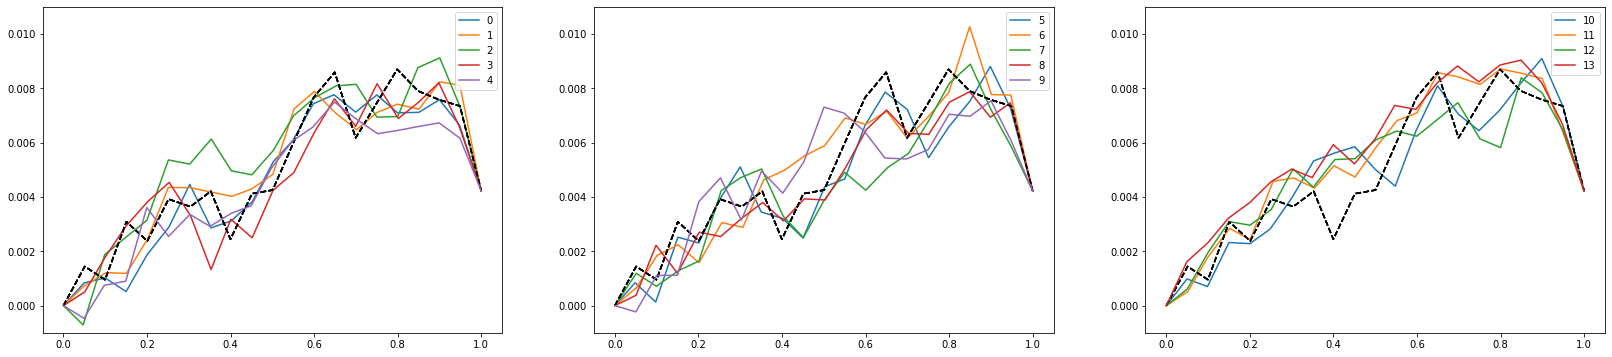

In [51]:
# 시각화 1


fig, axes = plt.subplots(nrows=1, ncols = 3, figsize = (28, 6))


# base는 따로 빼고 그려줘
for i in range(len( uplift_model_20_300 )-1 ):
    if i < 5 :
        # base
        axes[0].plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , color='black', linestyle='dashed')
        # 후보모델
        axes[0].plot(uplift_model_20_300[i].test_results_.aqini_x,  uplift_model_20_300[i].test_results_.aqini_y , label = i )
    elif i < 10 :
        # base
        axes[1].plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , color='black', linestyle='dashed' )
        # 후보모델
        axes[1].plot(uplift_model_20_300[i].test_results_.aqini_x,  uplift_model_20_300[i].test_results_.aqini_y , label = i )
    else:
        # base
        axes[2].plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , color='black', linestyle='dashed' )
        # 후보모델
        axes[2].plot(uplift_model_20_300[i].test_results_.aqini_x,  uplift_model_20_300[i].test_results_.aqini_y , label = i )
        
axes[0].set_ylim(-0.001, 0.011)
axes[0].legend(loc="upper right")
axes[1].set_ylim(-0.001, 0.011)
axes[1].legend(loc="upper right")
axes[2].set_ylim(-0.001, 0.011)
axes[2].legend(loc="upper right")


plt.legend()
plt.show()
plt.close()

In [52]:
cate_step2

['mail_yn',
 'rgt_elapsed_days_seg',
 'visit_gubn',
 'buying_trend_group',
 'last_buy_seg',
 'text_mail_wemakepay',
 'buy_amount_avg_all_seg',
 'push_yn',
 'text_yn',
 'birth',
 'text_mail_wemakepay_bool',
 'wmp_pay_yn',
 'ad_uv_yn',
 'last_buy_platform']

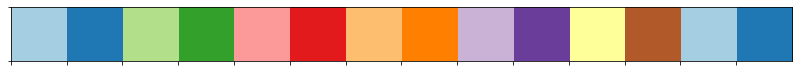

In [53]:
sns.palplot(sns.color_palette("Paired", 14))

In [54]:
cmap = sns.color_palette("Paired", 14)

In [55]:
len(cmap)

14

In [56]:
cmap[0]

(0.6509803921568628, 0.807843137254902, 0.8901960784313725)

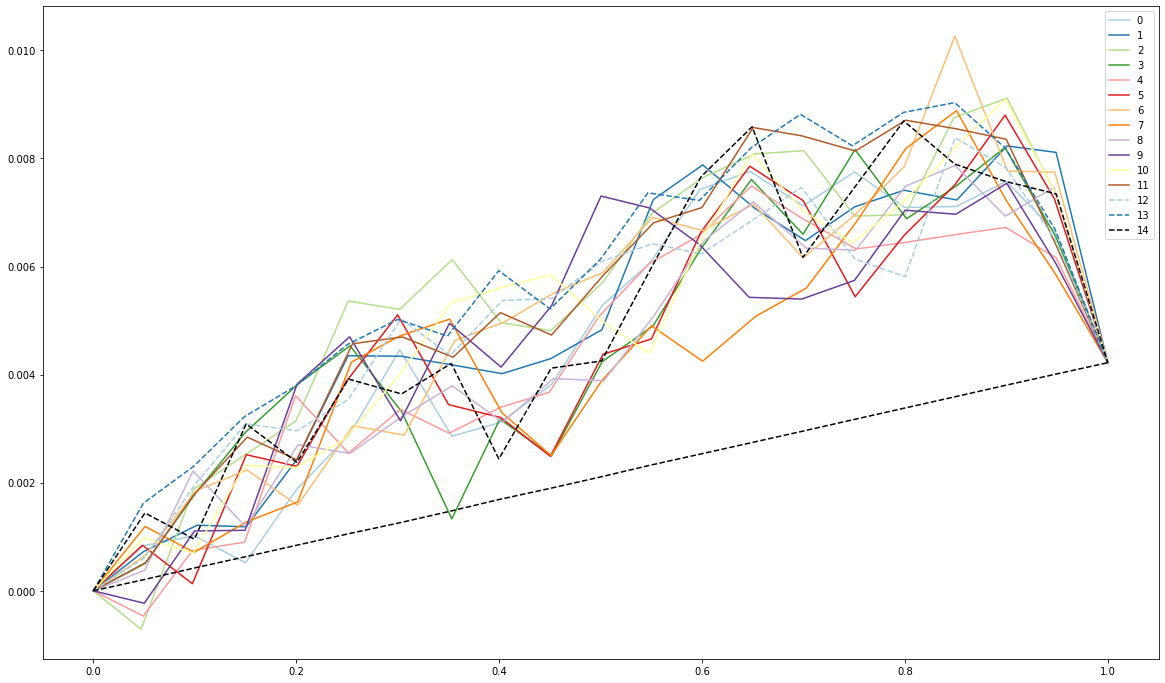

In [57]:
plt.figure(figsize = (20, 12))

for i in range(len(uplift_model_20_300)):    
    if i == 14:
        # 마지막이라면, base 모델 그려주고
        plt.plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , label = i, color = 'black', linestyle='dashed' )
        plt.plot(uplift_model_20_300[i].test_results_.aqini_x,  [uplift_model_20_300[i].test_results_.aqini_y[-1]/20*x for x in range(20+1)], color='black', linestyle='dashed')
    
    elif i == 12 or i == 13:
        plt.plot(uplift_model_20_300[i].test_results_.aqini_x,  uplift_model_20_300[i].test_results_.aqini_y , label = i, color = cmap[i], linestyle='dashed')
        
    else:
        plt.plot(uplift_model_20_300[i].test_results_.aqini_x,  uplift_model_20_300[i].test_results_.aqini_y , label = i, color = cmap[i])

plt.legend()
plt.show()
plt.close()

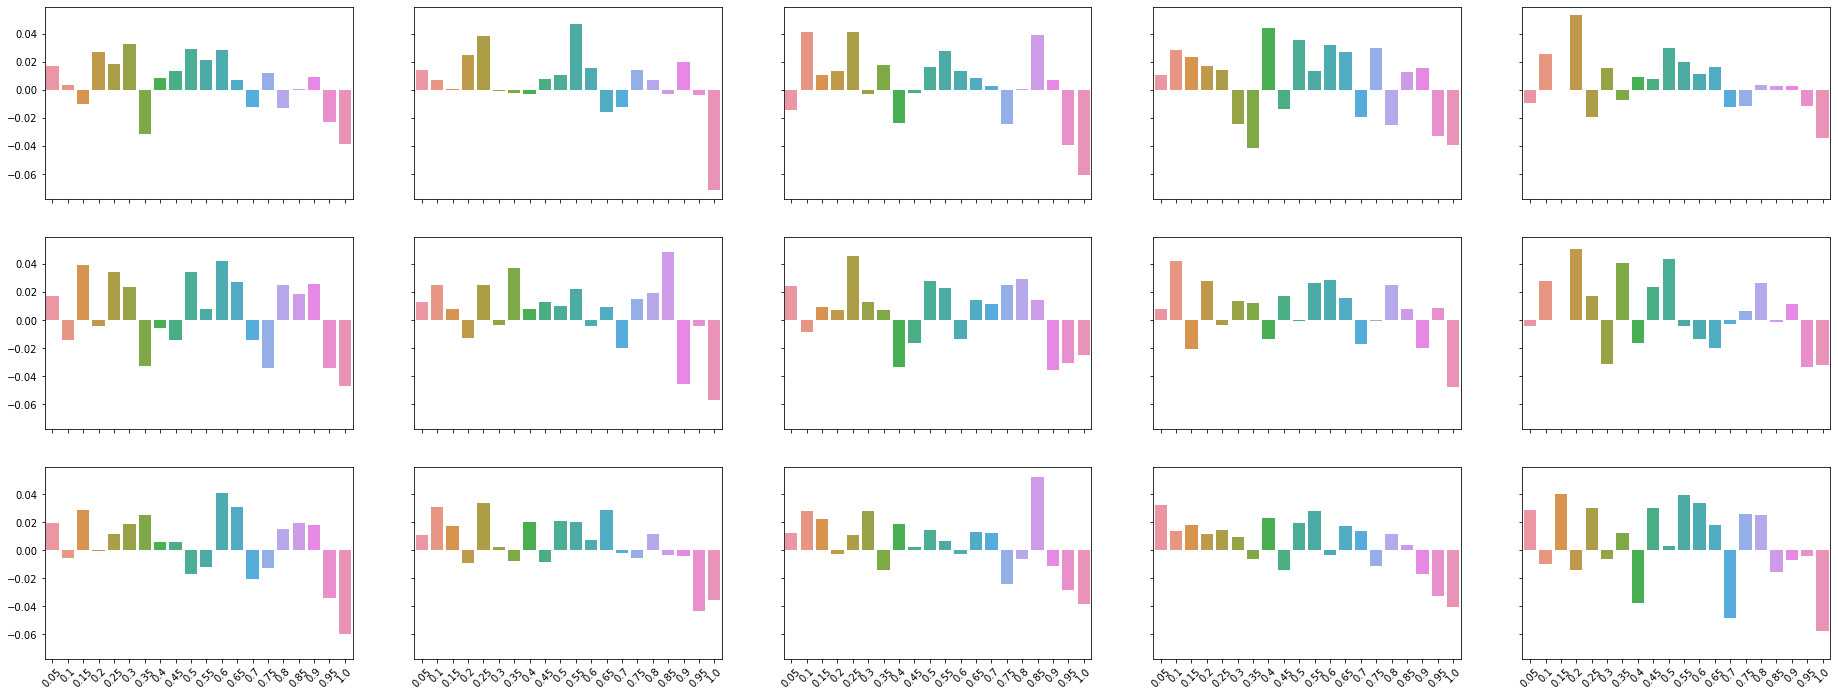

In [58]:
# 후보 35
fig, axes = plt.subplots(nrows = 3, ncols = 5, sharey = True, sharex=True, figsize = (32, 12))

axes = axes.flatten()

for i in range(len(uplift_model_20_300) ):
    if i == len(uplift_model_20_300): # 마지막에 base 그려준다
        sns.barplot(np.around(uplift_model_base.test_results_.uplift_x, 2), uplift_model_base.test_results_.uplift_y, ax = axes[i])
    else:
        sns.barplot(np.around(uplift_model_20_300[i].test_results_.uplift_x, 2), uplift_model_20_300[i].test_results_.uplift_y, ax = axes[i])

for ax in axes:
    ax.tick_params('x', labelrotation=45)
plt.show()
plt.close()

---

### ### q1_aqini

In [59]:
cate_step2

['mail_yn',
 'rgt_elapsed_days_seg',
 'visit_gubn',
 'buying_trend_group',
 'last_buy_seg',
 'text_mail_wemakepay',
 'buy_amount_avg_all_seg',
 'push_yn',
 'text_yn',
 'birth',
 'text_mail_wemakepay_bool',
 'wmp_pay_yn',
 'ad_uv_yn',
 'last_buy_platform']

In [60]:
# base
uplift_model_base.test_results_.q1_aqini

0.036604643322726525

In [62]:
# 7이 곧 base다
for i in range(len(uplift_model_20_300)):
    print( '{} :'.format(i), uplift_model_20_300[i].test_results_.q1_aqini )

0 : 0.03347505606390343
1 : 0.0372986427105033
2 : 0.04370596156921248
3 : 0.0320335456758606
4 : 0.02925630373920962
5 : 0.03224265716281283
6 : 0.037702459405291405
7 : 0.029487089763036104
8 : 0.031081919917771355
9 : 0.033065109674418516
10 : 0.037994702360143635
11 : 0.04320615801344381
12 : 0.03774214156786738
13 : 0.04664454687288632
14 : 0.036604643322726525


----

### ### 상위 50%의 uplift 기준으로 평가

In [63]:
# 상위 50% 의 uplift 값의 합을 본다 - (조건)percentile 에 따라서 다른 가중치를 갖는다!

uplift_model_20_300_half_sum = {}
for i in range(len( uplift_model_20_300 )):
    uplift_model_20_300_half_sum[i] = np.sum( [up_*(10-i) for i,up_ in enumerate(uplift_model_20_300[i].test_results_.uplift_y[:10])] )
        

In [64]:
pd.DataFrame(index = uplift_model_20_300_half_sum.keys(), data = uplift_model_20_300_half_sum.values(), columns = ['half_sum'] ).sort_values(by='half_sum', ascending=False)

,half_sum
13,0.839588
12,0.759282
9,0.713959
11,0.705772
6,0.674960
2,0.652154
10,0.650578
1,0.616586
3,0.602623
14,0.572133


In [65]:
uplift_model_20_300_upresult = pd.DataFrame(index = uplift_model_20_300_half_sum.keys(), data = uplift_model_20_300_half_sum.values(), columns = ['half_sum'] )

In [66]:
uplift_model_20_300_upresult.sort_values(by='half_sum', ascending=False)

,half_sum
13,0.839588
12,0.759282
9,0.713959
11,0.705772
6,0.674960
2,0.652154
10,0.650578
1,0.616586
3,0.602623
14,0.572133


---

### - 21일

In [40]:
len(fin_candidate_list)

15

In [41]:
# 마지막 데이터가 base다
fin_candidate_list[14].head()

,start_date,result_buy_yn,cont_group,ratio_spc / wmp_stay_avg,text_mail_wemakepay search_cnt,buy_cnt_payment_3day dt_cnt_last_buy uv_cnt,buy_period cate_buy_cnt dt_cnt_last_buy,dt_cnt_last_buy wmp_freq text_mail_wemakepay
0,2019-11-20,1,0,0.128571,168.0,990.0,396.0,192.0
1,2019-11-14,0,1,-0.500000,-2.0,712.0,31684.0,1780.0
2,2019-11-14,0,0,0.066667,44.0,108.0,1296.0,216.0
3,2019-11-11,0,1,-1.000000,50.0,70.0,1470.0,84.0
4,2019-11-12,0,1,0.266667,100.0,3472.0,3906.0,1922.0


In [38]:
# test : 20일

data_input_list = []

for i, candidate_ in enumerate(fin_candidate_list):
    train_ =  candidate_[candidate_.start_date < '2019-11-21'].drop(columns = ['start_date']) 
    test_ = candidate_[candidate_.start_date == '2019-11-21'].drop(columns = ['start_date'])
    data_input_list.append( (train_, test_) )

In [43]:
default_parameters = {'base_score':0.5, 'booster':'gbtree', 'colsample_bylevel':1,
             'colsample_bynode':1, 'colsample_bytree':1, 'gamma':0,
             'importance_type':'gain', 'learning_rate':0.1, 'max_delta_step':0,
             'max_depth':3, 'min_child_weight':1, 'missing':None, 'n_estimators':100,
             'n_jobs':1, 'num_parallel_tree':1, 'objective':'reg:squarederror',
             'random_state':0, 'reg_alpha':0, 'reg_lambda':1, 'scale_pos_weight':1,
             'subsample':1, 'tree_method':'auto', 'verbosity':1}

In [44]:
# base가 가장 마지막에 있다.
len(data_input_list)

15

#### (1) n_estimators : 100

In [45]:
def parallelize_dataframe(df_split, func):
    
    pool = multiprocessing.Pool( num_cores )
    stats_list = pool.map(func, df_split) # 리스트 형태로 떨궈준다
    pool.close()
    pool.join()
    print('parallel finished !')
    return stats_list

In [46]:
def make_model( data_input ):
    
    
    up = pylift.TransformedOutcome( data_input , col_treatment='cont_group', col_outcome='result_buy_yn' )
    up.fit( ** default_parameters )
    
    model_save = pickle.dumps(up)
    return model_save

In [47]:
%%time

### error_mse 구했다

num_cores = len( data_input_list )  # 

# df_split은 위에 정의했다
data_parallel = parallelize_dataframe( data_input_list , make_model )

parallel finished !
CPU times: user 3.48 s, sys: 4.81 s, total: 8.3 s
Wall time: 51.8 s


In [48]:
# 모델 저장!

uplift_model_21 = {}
for i in range(len(data_parallel)):
    uplift_model_21[i] = pickle.loads(data_parallel[i])

In [49]:
len(uplift_model_21)

15

---

In [50]:
len(uplift_model_21)

15

In [198]:
uplift_model.keys()

dict_keys([0])

In [51]:
# base는 따로 빼고 그려줘
uplift_model_base = uplift_model_21[14]

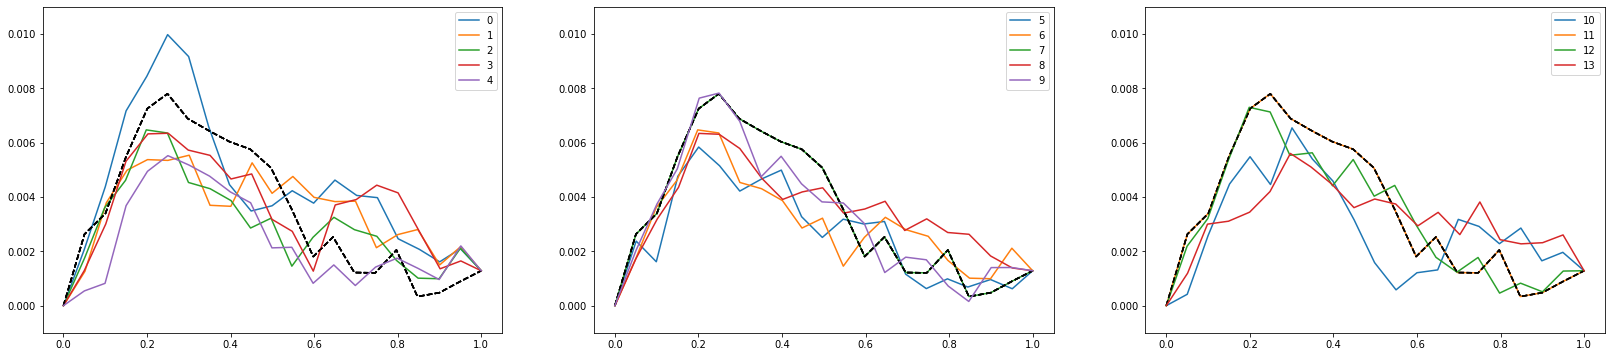

In [52]:
# 시각화 1


fig, axes = plt.subplots(nrows=1, ncols = 3, figsize = (28, 6))

# base는 따로 빼고 그려줘

for i in range(len(uplift_model_21)-1 ):
    if i < 5 :
        # base
        axes[0].plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , color='black', linestyle='dashed')
        # 후보모델
        axes[0].plot(uplift_model_21[i].test_results_.aqini_x,  uplift_model_21[i].test_results_.aqini_y , label = i )
    elif i < 10 :
        # base
        axes[1].plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , color='black', linestyle='dashed' )
        # 후보모델
        axes[1].plot(uplift_model_21[i].test_results_.aqini_x,  uplift_model_21[i].test_results_.aqini_y , label = i )
    else:
        # base
        axes[2].plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , color='black', linestyle='dashed' )
        # 후보모델
        axes[2].plot(uplift_model_21[i].test_results_.aqini_x,  uplift_model_21[i].test_results_.aqini_y , label = i )
        
axes[0].set_ylim(-0.001, 0.011)
axes[0].legend(loc="upper right")
axes[1].set_ylim(-0.001, 0.011)
axes[1].legend(loc="upper right")
axes[2].set_ylim(-0.001, 0.011)
axes[2].legend(loc="upper right")


plt.legend()
plt.show()
plt.close()

In [53]:
cate_step2

['push_yn',
 'text_yn',
 'text_mail_wemakepay',
 'last_buy_platform',
 'last_buy_seg',
 'rgt_elapsed_days_seg',
 'text_mail_wemakepay_bool',
 'mail_yn',
 'buy_amount_avg_all_seg',
 'buying_trend_group',
 'visit_gubn',
 'ad_uv_yn',
 'wmp_pay_yn',
 'birth']

In [54]:
cmap = sns.color_palette("Paired", 14)

In [55]:
len(cmap)

14

In [56]:
cmap[0]

(0.6509803921568628, 0.807843137254902, 0.8901960784313725)

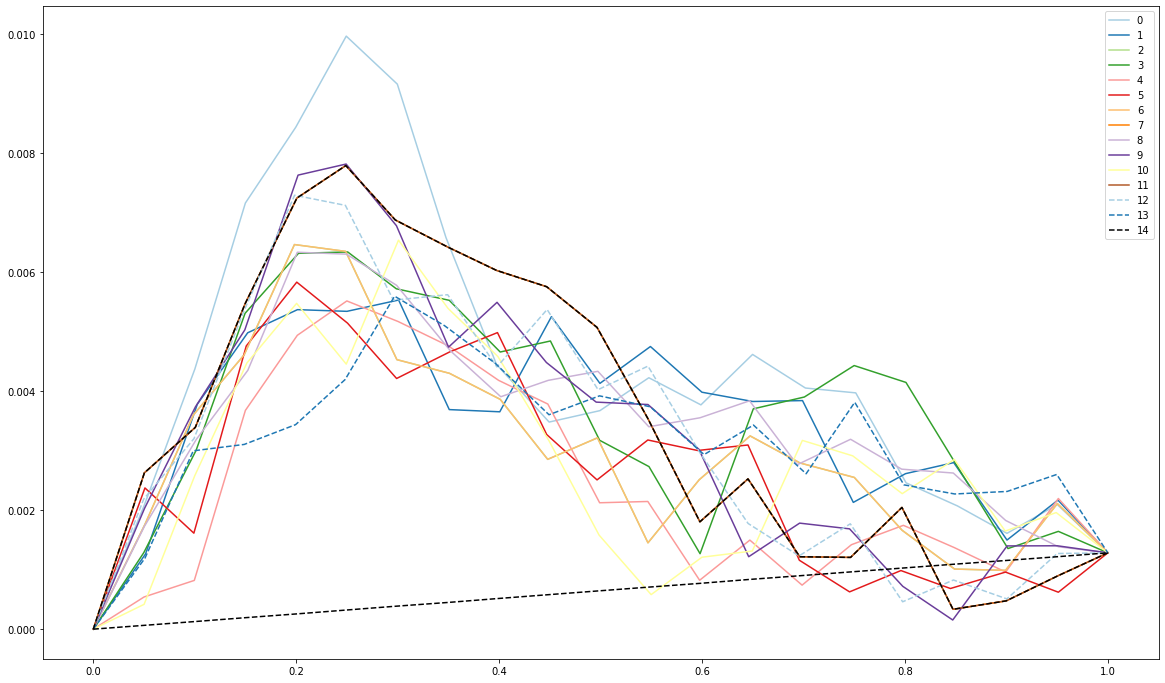

In [57]:
plt.figure(figsize = (20, 12))

for i in range(len(uplift_model_21)):
    
    if i == 14:
        # 마지막이라면, base 모델 그려주고
        plt.plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , label = i, color = 'black', linestyle='dashed' )
        plt.plot(uplift_model_21[i].test_results_.aqini_x,  [uplift_model_21[i].test_results_.aqini_y[-1]/20*x for x in range(20+1)], color='black', linestyle='dashed')
    
    elif i == 12 or i == 13:
        plt.plot(uplift_model_21[i].test_results_.aqini_x,  uplift_model_21[i].test_results_.aqini_y , label = i, color = cmap[i], linestyle = 'dashed')
    
    else:
        plt.plot(uplift_model_21[i].test_results_.aqini_x,  uplift_model_21[i].test_results_.aqini_y , label = i, color = cmap[i])
   

plt.legend()
plt.show()
plt.close()

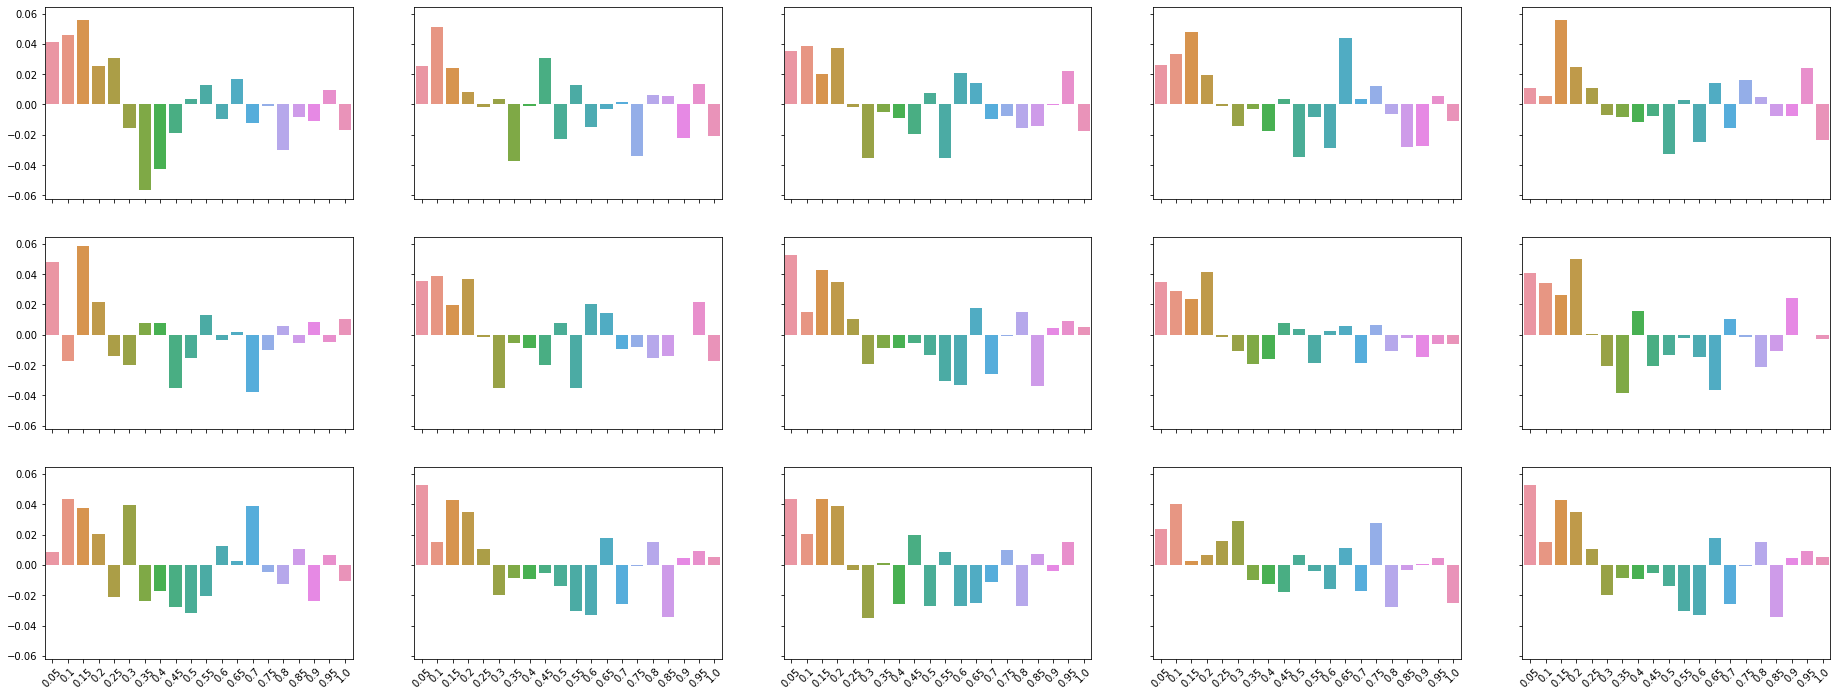

In [58]:
# 후보 35
fig, axes = plt.subplots(nrows = 3, ncols = 5, sharey = True, sharex=True, figsize = (32, 12))

axes = axes.flatten()

for i in range(len(uplift_model_21) ):
    if i == len(uplift_model_21): # 마지막에 base 그려준다
        sns.barplot(np.around(uplift_model_base.test_results_.uplift_x, 2), uplift_model_base.test_results_.uplift_y, ax = axes[i])
    else:
        sns.barplot(np.around(uplift_model_21[i].test_results_.uplift_x, 2), uplift_model_21[i].test_results_.uplift_y, ax = axes[i])

for ax in axes:
    ax.tick_params('x', labelrotation=45)
plt.show()
plt.close()

---

### ### q1_aqini

In [59]:
cate_step1

['referral_flag',
 'order_route',
 'buy_ep_yn_3day',
 'cate_main_buy',
 'cate_main_buy_',
 'buy_cate_3day',
 'weekday']

In [60]:
# base
uplift_model_base.test_results_.q1_aqini

0.03631829215498327

In [61]:
# 7이 곧 base다
for i in range(len(uplift_model_21)):
    print( '{} :'.format(i), uplift_model_21[i].test_results_.q1_aqini )

0 : 0.0479975303695737
1 : 0.03606895983294875
2 : 0.028690805036147703
3 : 0.0365052870759316
4 : 0.023773801706325943
5 : 0.027150034896595784
6 : 0.028690805036147703
7 : 0.03631829215498327
8 : 0.03635682800149398
9 : 0.03439986496648656
10 : 0.0270472575103382
11 : 0.03631829215498327
12 : 0.0344341067114096
13 : 0.03345820815968823
14 : 0.03631829215498327


----

### ### 상위 50%의 uplift 기준으로 평가

In [62]:
# 상위 50% 의 uplift 값의 합을 본다 - (조건)percentile 에 따라서 다른 가중치를 갖는다!

uplift_model_21_half_sum = {}
for i in range(len( uplift_model_21 )):
    uplift_model_21_half_sum[i] = np.sum( [up_*(10-i) for i,up_ in enumerate(uplift_model_21[i].test_results_.uplift_y[:10])] )
        

In [63]:
uplift_model_21_half_sum

{0: 1.1725405685418924,
 1: 0.8578248295203567,
 2: 0.8520916466856572,
 3: 0.9097896357312514,
 4: 0.6957993741118287,
 5: 0.7237259127347193,
 6: 0.8520916466856572,
 7: 1.1258283959613962,
 8: 0.9144768682441279,
 9: 1.0127744148348825,
 10: 0.7559018146395774,
 11: 1.1258283959613962,
 12: 0.9834951617361991,
 13: 0.7992258459538406,
 14: 1.1258283959613962}

In [64]:
pd.DataFrame(index = uplift_model_21_half_sum.keys(), data = uplift_model_21_half_sum.values(), columns = ['half_sum'] ).sort_values(by='half_sum', ascending=False)

,half_sum
0,1.172541
7,1.125828
11,1.125828
14,1.125828
9,1.012774
12,0.983495
8,0.914477
3,0.909790
1,0.857825
2,0.852092


In [65]:
uplift_model_21_upresult = pd.DataFrame(index = uplift_model_21_half_sum.keys(), data = uplift_model_21_half_sum.values(), columns = ['half_sum'] )

In [66]:
uplift_model_21_upresult.sort_values(by='half_sum', ascending=False) # base랑 0이랑 비슷하구먼

,half_sum
0,1.172541
7,1.125828
11,1.125828
14,1.125828
9,1.012774
12,0.983495
8,0.914477
3,0.909790
1,0.857825
2,0.852092


---

#### (2) n_estimators : 30

In [39]:
# base가 가장 마지막에 있다.
len(data_input_list)

15

- multiprocessing

In [40]:
parameters = default_parameters.copy()
parameters.update({'n_estimators' : 30})

In [41]:
def parallelize_dataframe(df_split, func):
    
    pool = multiprocessing.Pool( num_cores )
    stats_list = pool.map(func, df_split) # 리스트 형태로 떨궈준다
    pool.close()
    pool.join()
    print('parallel finished !')
    return stats_list

In [42]:
def make_model( data_input ):
    
    
    up = pylift.TransformedOutcome( data_input , col_treatment='cont_group', col_outcome='result_buy_yn' )    
    
    up.fit( **parameters )
    
    model_save = pickle.dumps(up)
    return model_save

In [43]:
%%time

### error_mse 구했다

num_cores = len( data_input_list )  # 

# df_split은 위에 정의했다
data_parallel = parallelize_dataframe( data_input_list , make_model )

parallel finished !
CPU times: user 3.49 s, sys: 4.25 s, total: 7.73 s
Wall time: 40 s


In [44]:
# 모델 저장!

uplift_model_21_30 = {}
for i in range(len(data_parallel)):
    uplift_model_21_30[i] = pickle.loads(data_parallel[i])

In [45]:
len(uplift_model_21_30)

15

---

In [46]:
len( uplift_model_21_30 )

15

In [47]:
uplift_model_21_30.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [48]:
# base는 따로 빼고 그려줘
uplift_model_base = uplift_model_21_30[14]

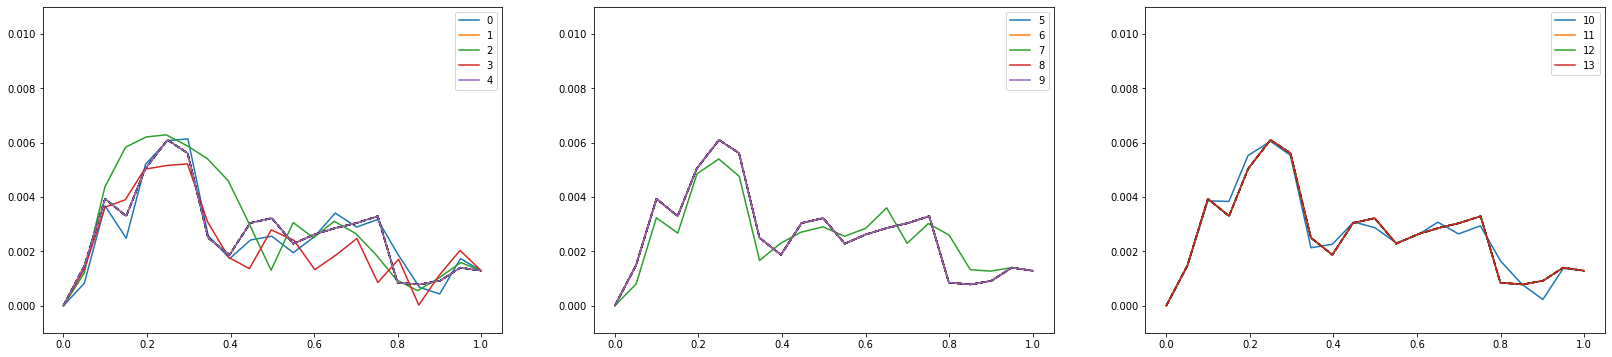

In [49]:
# 시각화 1


fig, axes = plt.subplots(nrows=1, ncols = 3, figsize = (28, 6))


# base는 따로 빼고 그려줘
for i in range(len( uplift_model_21_30 )-1 ):
    if i < 5 :
        # base
        axes[0].plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , color='black', linestyle='dashed')
        # 후보모델
        axes[0].plot(uplift_model_21_30[i].test_results_.aqini_x,  uplift_model_21_30[i].test_results_.aqini_y , label = i )
    elif i < 10 :
        # base
        axes[1].plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , color='black', linestyle='dashed' )
        # 후보모델
        axes[1].plot(uplift_model_21_30[i].test_results_.aqini_x,  uplift_model_21_30[i].test_results_.aqini_y , label = i )
    else:
        # base
        axes[2].plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , color='black', linestyle='dashed' )
        # 후보모델
        axes[2].plot(uplift_model_21_30[i].test_results_.aqini_x,  uplift_model_21_30[i].test_results_.aqini_y , label = i )
        
axes[0].set_ylim(-0.001, 0.011)
axes[0].legend(loc="upper right")
axes[1].set_ylim(-0.001, 0.011)
axes[1].legend(loc="upper right")
axes[2].set_ylim(-0.001, 0.011)
axes[2].legend(loc="upper right")


plt.legend()
plt.show()
plt.close()

In [50]:
cate_step2

['buy_amount_avg_all_seg',
 'rgt_elapsed_days_seg',
 'push_yn',
 'birth',
 'text_mail_wemakepay',
 'mail_yn',
 'wmp_pay_yn',
 'visit_gubn',
 'text_mail_wemakepay_bool',
 'buying_trend_group',
 'last_buy_platform',
 'last_buy_seg',
 'ad_uv_yn',
 'text_yn']

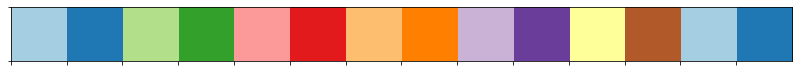

In [51]:
sns.palplot(sns.color_palette("Paired", 14))

In [52]:
cmap = sns.color_palette("Paired", 14)

In [53]:
len(cmap)

14

In [54]:
cmap[0]

(0.6509803921568628, 0.807843137254902, 0.8901960784313725)

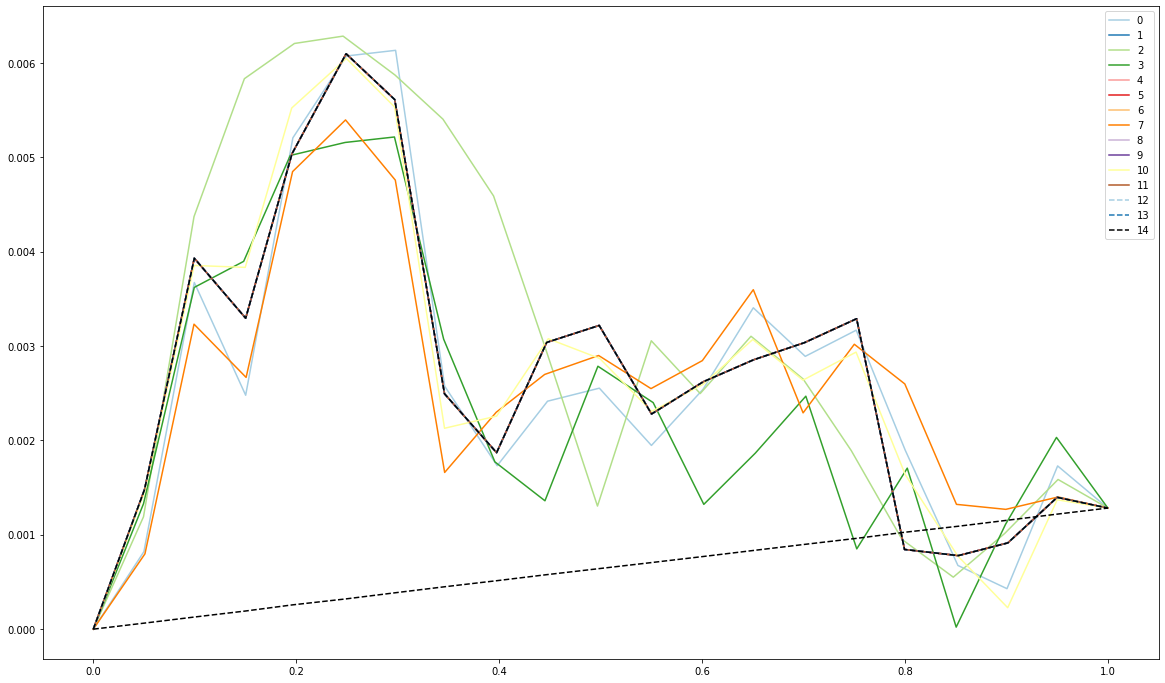

In [56]:
plt.figure(figsize = (20, 12))

for i in range(len(uplift_model_21_30)):    
    if i == 14:
        # 마지막이라면, base 모델 그려주고
        plt.plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , label = i, color = 'black', linestyle='dashed' )
        plt.plot(uplift_model_21_30[i].test_results_.aqini_x,  [uplift_model_21_30[i].test_results_.aqini_y[-1]/20*x for x in range(20+1)], color='black', linestyle='dashed')
    
    elif i == 12 or i == 13:
        plt.plot(uplift_model_21_30[i].test_results_.aqini_x,  uplift_model_21_30[i].test_results_.aqini_y , label = i, color = cmap[i], linestyle = 'dashed')
    
    else:
        plt.plot(uplift_model_21_30[i].test_results_.aqini_x,  uplift_model_21_30[i].test_results_.aqini_y , label = i, color = cmap[i])

plt.legend()
plt.show()
plt.close()

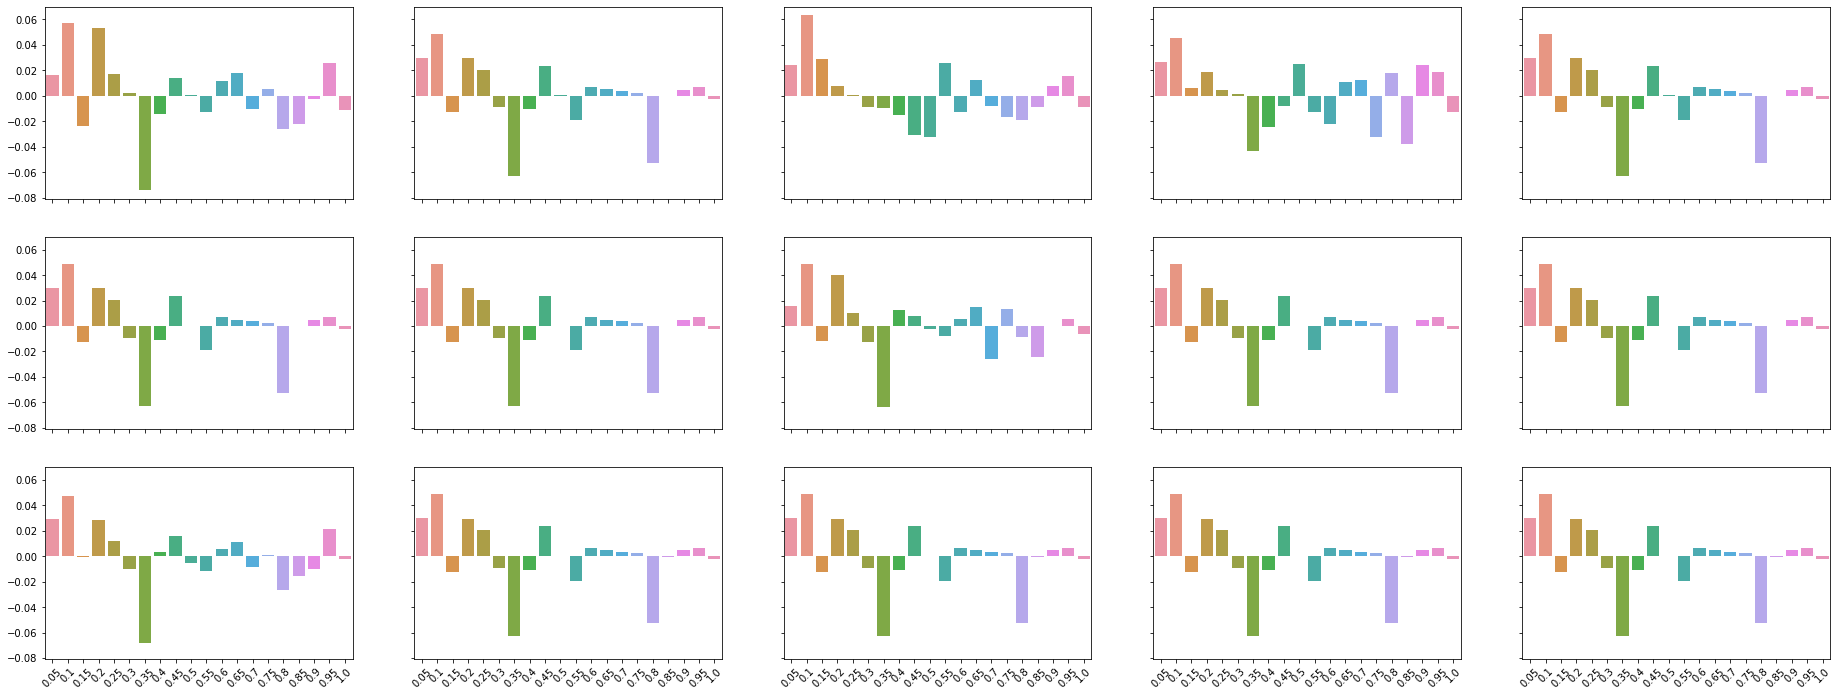

In [57]:
# 후보 35
fig, axes = plt.subplots(nrows = 3, ncols = 5, sharey = True, sharex=True, figsize = (32, 12))

axes = axes.flatten()

for i in range(len(uplift_model_21_30) ):
    if i == len(uplift_model_21_30): # 마지막에 base 그려준다
        sns.barplot(np.around(uplift_model_base.test_results_.uplift_x, 2), uplift_model_base.test_results_.uplift_y, ax = axes[i])
    else:
        sns.barplot(np.around(uplift_model_21_30[i].test_results_.uplift_x, 2), uplift_model_21_30[i].test_results_.uplift_y, ax = axes[i])

for ax in axes:
    ax.tick_params('x', labelrotation=45)
plt.show()
plt.close()

---

### ### q1_aqini

In [58]:
cate_step2

['buy_amount_avg_all_seg',
 'rgt_elapsed_days_seg',
 'push_yn',
 'birth',
 'text_mail_wemakepay',
 'mail_yn',
 'wmp_pay_yn',
 'visit_gubn',
 'text_mail_wemakepay_bool',
 'buying_trend_group',
 'last_buy_platform',
 'last_buy_seg',
 'ad_uv_yn',
 'text_yn']

In [59]:
# base
uplift_model_base.test_results_.q1_aqini

0.025572540264314665

In [60]:
# 7이 곧 base다
for i in range(len(uplift_model_21_30)):
    print( '{} :'.format(i), uplift_model_21_30[i].test_results_.q1_aqini )

0 : 0.02510690277244317
1 : 0.025572540264314665
2 : 0.028782592155310913
3 : 0.01971537163595875
4 : 0.025572540264314665
5 : 0.025572540264314665
6 : 0.025572540264314665
7 : 0.02495951183435707
8 : 0.025572540264314665
9 : 0.025572540264314665
10 : 0.025308158341489553
11 : 0.025572540264314665
12 : 0.025572540264314665
13 : 0.025572540264314665
14 : 0.025572540264314665


----

### ### 상위 50%의 uplift 기준으로 평가

In [61]:
# 상위 50% 의 uplift 값의 합을 본다 - (조건)percentile 에 따라서 다른 가중치를 갖는다!

uplift_model_21_30_half_sum = {}
for i in range(len( uplift_model_21_30 )):
    uplift_model_21_30_half_sum[i] = np.sum( [up_*(10-i) for i,up_ in enumerate(uplift_model_21_30[i].test_results_.uplift_y[:10])] )
        

In [62]:
uplift_model_21_30_half_sum

{0: 0.6587580836039381,
 1: 0.6795604808349432,
 2: 0.8739427821206953,
 3: 0.6426529024061514,
 4: 0.6795604808349432,
 5: 0.6795604808349432,
 6: 0.6795604808349432,
 7: 0.586049260737174,
 8: 0.6795604808349432,
 9: 0.6795604808349432,
 10: 0.6978499436763703,
 11: 0.6795604808349432,
 12: 0.6795604808349432,
 13: 0.6795604808349432,
 14: 0.6795604808349432}

In [63]:
pd.DataFrame(index = uplift_model_21_30_half_sum.keys(), data = uplift_model_21_30_half_sum.values(), columns = ['half_sum'] ).sort_values(by='half_sum', ascending=False)

,half_sum
2,0.873943
10,0.697850
1,0.679560
4,0.679560
5,0.679560
6,0.679560
8,0.679560
9,0.679560
11,0.679560
12,0.679560


In [64]:
uplift_model_21_30_upresult = pd.DataFrame(index = uplift_model_21_30_half_sum.keys(), data = uplift_model_21_30_half_sum.values(), columns = ['half_sum'] )

In [65]:
uplift_model_21_30_upresult.sort_values(by='half_sum', ascending=False)

,half_sum
2,0.873943
10,0.697850
1,0.679560
4,0.679560
5,0.679560
6,0.679560
8,0.679560
9,0.679560
11,0.679560
12,0.679560


---

### - 22일

In [265]:
len(fin_candidate_list)

8

In [39]:
# 마지막 데이터가 base다
fin_candidate_list[14].head()

,start_date,result_buy_yn,cont_group,ratio_spc / wmp_stay_avg,text_mail_wemakepay search_cnt,buy_cnt_payment_3day dt_cnt_last_buy uv_cnt,buy_period cate_buy_cnt dt_cnt_last_buy,dt_cnt_last_buy wmp_freq text_mail_wemakepay
0,2019-11-20,1,0,0.128571,168.0,990.0,396.0,192.0
1,2019-11-14,0,1,-0.500000,-2.0,712.0,31684.0,1780.0
2,2019-11-14,0,0,0.066667,44.0,108.0,1296.0,216.0
3,2019-11-11,0,1,-1.000000,50.0,70.0,1470.0,84.0
4,2019-11-12,0,1,0.266667,100.0,3472.0,3906.0,1922.0


In [40]:
# test : 22일

data_input_list = []

for i, candidate_ in enumerate(fin_candidate_list):
    train_ =  candidate_[candidate_.start_date < '2019-11-22'].drop(columns = ['start_date']) 
    test_ = candidate_[candidate_.start_date == '2019-11-22'].drop(columns = ['start_date'])
    data_input_list.append( (train_, test_) )

In [41]:
default_parameters = {'base_score':0.5, 'booster':'gbtree', 'colsample_bylevel':1,
             'colsample_bynode':1, 'colsample_bytree':1, 'gamma':0,
             'importance_type':'gain', 'learning_rate':0.1, 'max_delta_step':0,
             'max_depth':3, 'min_child_weight':1, 'missing':None, 'n_estimators':100,
             'n_jobs':1, 'num_parallel_tree':1, 'objective':'reg:squarederror',
             'random_state':0, 'reg_alpha':0, 'reg_lambda':1, 'scale_pos_weight':1,
             'subsample':1, 'tree_method':'auto', 'verbosity':1}

In [42]:
# base가 가장 마지막에 있다.
len(data_input_list)

15

#### (1) n_estimators : 100

In [43]:
def parallelize_dataframe(df_split, func):
    
    pool = multiprocessing.Pool( num_cores )
    stats_list = pool.map(func, df_split) # 리스트 형태로 떨궈준다
    pool.close()
    pool.join()
    print('parallel finished !')
    return stats_list

In [44]:
def make_model( data_input ):
    
    
    up = pylift.TransformedOutcome( data_input , col_treatment='cont_group', col_outcome='result_buy_yn' )
    up.fit( ** default_parameters )
    
    model_save = pickle.dumps(up)
    return model_save

In [45]:
%%time

### error_mse 구했다

num_cores = len( data_input_list )  # 

# df_split은 위에 정의했다
data_parallel = parallelize_dataframe( data_input_list , make_model )

parallel finished !
CPU times: user 4.06 s, sys: 4.82 s, total: 8.88 s
Wall time: 58 s


In [46]:
# 모델 저장!

uplift_model_22 = {}
for i in range(len(data_parallel)):
    uplift_model_22[i] = pickle.loads(data_parallel[i])

In [49]:
len(uplift_model_22)

15

---

In [50]:
len(uplift_model_22)

15

In [51]:
uplift_model_22.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [52]:
# base는 따로 빼고 그려줘
uplift_model_base = uplift_model_22[14]

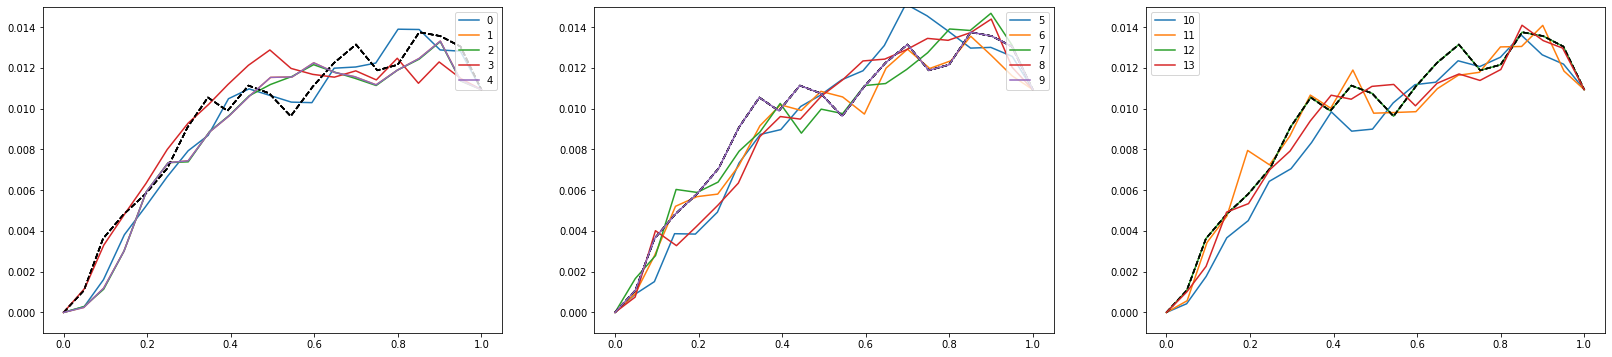

In [53]:
# 시각화 1


fig, axes = plt.subplots(nrows=1, ncols = 3, figsize = (28, 6))

# base는 따로 빼고 그려줘

for i in range(len(uplift_model_22)-1 ):
    if i < 5 :
        # base
        axes[0].plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , color='black', linestyle='dashed')
        # 후보모델
        axes[0].plot(uplift_model_22[i].test_results_.aqini_x,  uplift_model_22[i].test_results_.aqini_y , label = i )
    elif i < 10 :
        # base
        axes[1].plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , color='black', linestyle='dashed' )
        # 후보모델
        axes[1].plot(uplift_model_22[i].test_results_.aqini_x,  uplift_model_22[i].test_results_.aqini_y , label = i )
    else:
        # base
        axes[2].plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , color='black', linestyle='dashed' )
        # 후보모델
        axes[2].plot(uplift_model_22[i].test_results_.aqini_x,  uplift_model_22[i].test_results_.aqini_y , label = i )
        
axes[0].set_ylim(-0.001, 0.015)
axes[0].legend(loc="upper right")
axes[1].set_ylim(-0.001, 0.015)
axes[1].legend(loc="upper right")
axes[2].set_ylim(-0.001, 0.015)
axes[2].legend(loc="upper right")


plt.legend()
plt.show()
plt.close()

In [54]:
cate_step2

['buy_amount_avg_all_seg',
 'text_mail_wemakepay',
 'wmp_pay_yn',
 'push_yn',
 'text_mail_wemakepay_bool',
 'last_buy_seg',
 'rgt_elapsed_days_seg',
 'last_buy_platform',
 'birth',
 'text_yn',
 'visit_gubn',
 'mail_yn',
 'ad_uv_yn',
 'buying_trend_group']

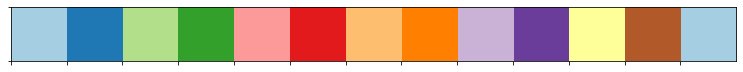

In [278]:
sns.palplot(sns.color_palette("Paired", 13))

In [55]:
cmap = sns.color_palette("Paired", 14)

In [56]:
len(cmap)

14

In [57]:
cmap[0]

(0.6509803921568628, 0.807843137254902, 0.8901960784313725)

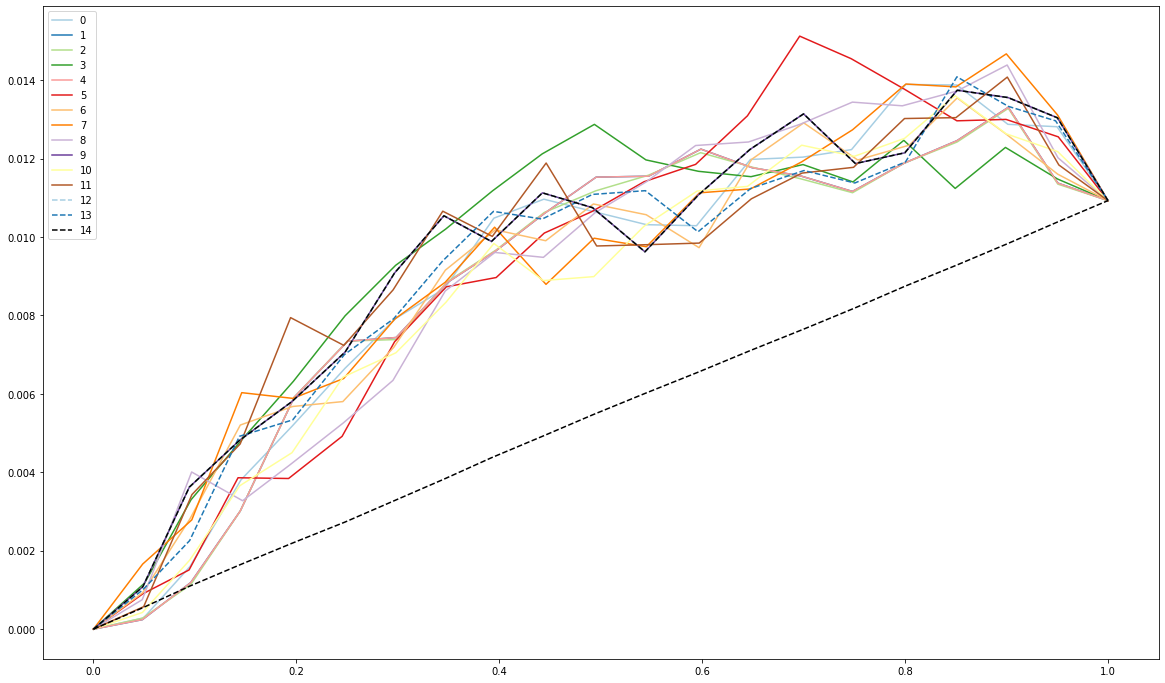

In [58]:
plt.figure(figsize = (20, 12))

for i in range(len(uplift_model_22)):
    
    if i == 14:
        # 마지막이라면, base 모델 그려주고
        plt.plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , label = i, color = 'black', linestyle='dashed' )
        plt.plot(uplift_model_22[i].test_results_.aqini_x,  [uplift_model_22[i].test_results_.aqini_y[-1]/20*x for x in range(20+1)], color='black', linestyle='dashed')
    
    elif i == 12 or i == 13:
        plt.plot(uplift_model_22[i].test_results_.aqini_x,  uplift_model_22[i].test_results_.aqini_y , label = i, color = cmap[i], linestyle='dashed')
        
    else:
        plt.plot(uplift_model_22[i].test_results_.aqini_x,  uplift_model_22[i].test_results_.aqini_y , label = i, color = cmap[i])
   

plt.legend()
plt.show()
plt.close()

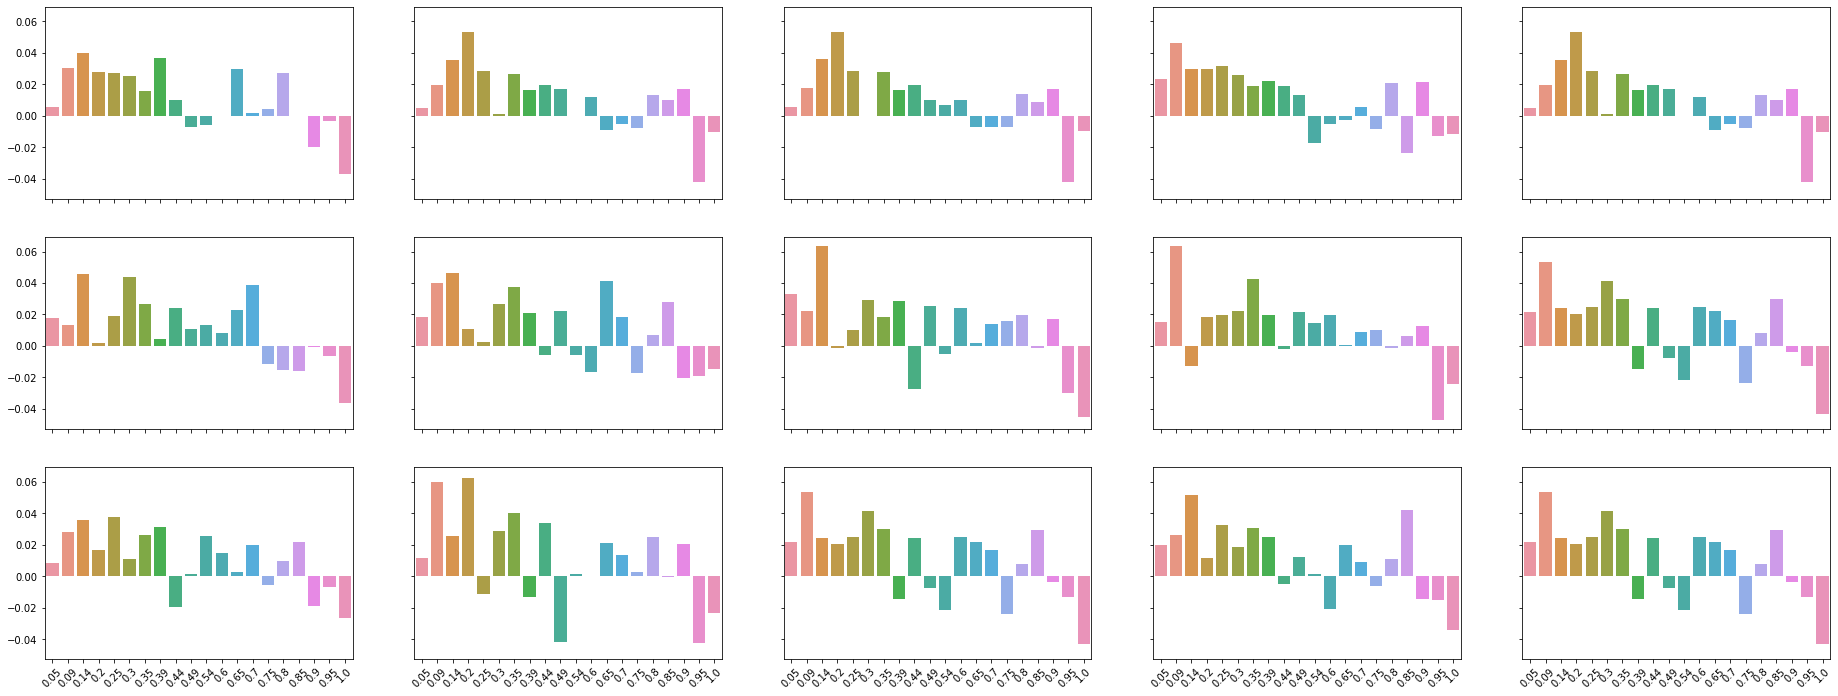

In [59]:
# 후보 35
fig, axes = plt.subplots(nrows = 3, ncols = 5, sharey = True, sharex=True, figsize = (32, 12))

axes = axes.flatten()

for i in range(len(uplift_model_22) ):
    if i == len(uplift_model_22): # 마지막에 base 그려준다
        sns.barplot(np.around(uplift_model_base.test_results_.uplift_x, 2), uplift_model_base.test_results_.uplift_y, ax = axes[i])
    else:
        sns.barplot(np.around(uplift_model_22[i].test_results_.uplift_x, 2), uplift_model_22[i].test_results_.uplift_y, ax = axes[i])

for ax in axes:
    ax.tick_params('x', labelrotation=45)
plt.show()
plt.close()

---

### ### q1_aqini

In [60]:
cate_step2

['buy_amount_avg_all_seg',
 'text_mail_wemakepay',
 'wmp_pay_yn',
 'push_yn',
 'text_mail_wemakepay_bool',
 'last_buy_seg',
 'rgt_elapsed_days_seg',
 'last_buy_platform',
 'birth',
 'text_yn',
 'visit_gubn',
 'mail_yn',
 'ad_uv_yn',
 'buying_trend_group']

In [61]:
# base
uplift_model_base.test_results_.q1_aqini

0.059204422523554345

In [62]:
# 7이 곧 base다
for i in range(len(uplift_model_22)):
    print( '{} :'.format(i), uplift_model_22[i].test_results_.q1_aqini )

0 : 0.05446392954199619
1 : 0.05229292759411329
2 : 0.0520824830790735
3 : 0.06099551241926235
4 : 0.05229292759411329
5 : 0.05667788389465362
6 : 0.053927389600610026
7 : 0.05915896282209265
8 : 0.05506383423418506
9 : 0.059204422523554345
10 : 0.0466285289847192
11 : 0.05667510228735778
12 : 0.059204422523554345
13 : 0.05443837847566815
14 : 0.059204422523554345


----

### ### 상위 50%의 uplift 기준으로 평가

In [63]:
# 상위 50% 의 uplift 값의 합을 본다 - (조건)percentile 에 따라서 다른 가중치를 갖는다!

uplift_model_22_half_sum = {}
for i in range(len( uplift_model_22 )):
    uplift_model_22_half_sum[i] = np.sum( [up_*(10-i) for i,up_ in enumerate(uplift_model_22[i].test_results_.uplift_y[:10])] )
        

In [64]:
uplift_model_22_half_sum

{0: 1.314757805980907,
 1: 1.2615564047372145,
 2: 1.257684952296834,
 3: 1.6047741598045255,
 4: 1.2615564047372145,
 5: 1.1876566006013074,
 6: 1.3606024344415766,
 7: 1.3711281691441748,
 8: 1.22264868548881,
 9: 1.502264280477139,
 10: 1.1782418570864235,
 11: 1.5190379236146192,
 12: 1.502264280477139,
 13: 1.416530688797936,
 14: 1.502264280477139}

In [65]:
pd.DataFrame(index = uplift_model_22_half_sum.keys(), data = uplift_model_22_half_sum.values(), columns = ['half_sum'] ).sort_values(by='half_sum', ascending=False)

,half_sum
3,1.604774
11,1.519038
9,1.502264
12,1.502264
14,1.502264
13,1.416531
7,1.371128
6,1.360602
0,1.314758
1,1.261556


In [66]:
uplift_model_22_upresult = pd.DataFrame(index = uplift_model_22_half_sum.keys(), data = uplift_model_22_half_sum.values(), columns = ['half_sum'] )

In [67]:
uplift_model_22_upresult.sort_values(by='half_sum', ascending=False) # base랑 0이랑 비슷하구먼

,half_sum
3,1.604774
11,1.519038
9,1.502264
12,1.502264
14,1.502264
13,1.416531
7,1.371128
6,1.360602
0,1.314758
1,1.261556


---

#### (2) n_estimators : 30

In [292]:
# base가 가장 마지막에 있다.
len(data_input_list)

8

- multiprocessing

In [41]:
parameters = default_parameters.copy()
parameters.update({'n_estimators' : 30})

In [42]:
def parallelize_dataframe(df_split, func):
    
    pool = multiprocessing.Pool( num_cores )
    stats_list = pool.map(func, df_split) # 리스트 형태로 떨궈준다
    pool.close()
    pool.join()
    print('parallel finished !')
    return stats_list

In [43]:
def make_model( data_input ):
    
    
    up = pylift.TransformedOutcome( data_input , col_treatment='cont_group', col_outcome='result_buy_yn' )    
    
    up.fit( **parameters )
    
    model_save = pickle.dumps(up)
    return model_save

In [44]:
%%time

### error_mse 구했다

num_cores = len( data_input_list )  # 

# df_split은 위에 정의했다
data_parallel = parallelize_dataframe( data_input_list , make_model )

parallel finished !
CPU times: user 3.79 s, sys: 4.86 s, total: 8.65 s
Wall time: 44.4 s


In [45]:
# 모델 저장!

uplift_model_22_30 = {}
for i in range(len(data_parallel)):
    uplift_model_22_30[i] = pickle.loads(data_parallel[i])

In [47]:
len(uplift_model_22_30)

15

---

In [48]:
len( uplift_model_22_30 )

15

In [49]:
uplift_model_22_30.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [50]:
# base는 따로 빼고 그려줘
uplift_model_base = uplift_model_22_30[14]

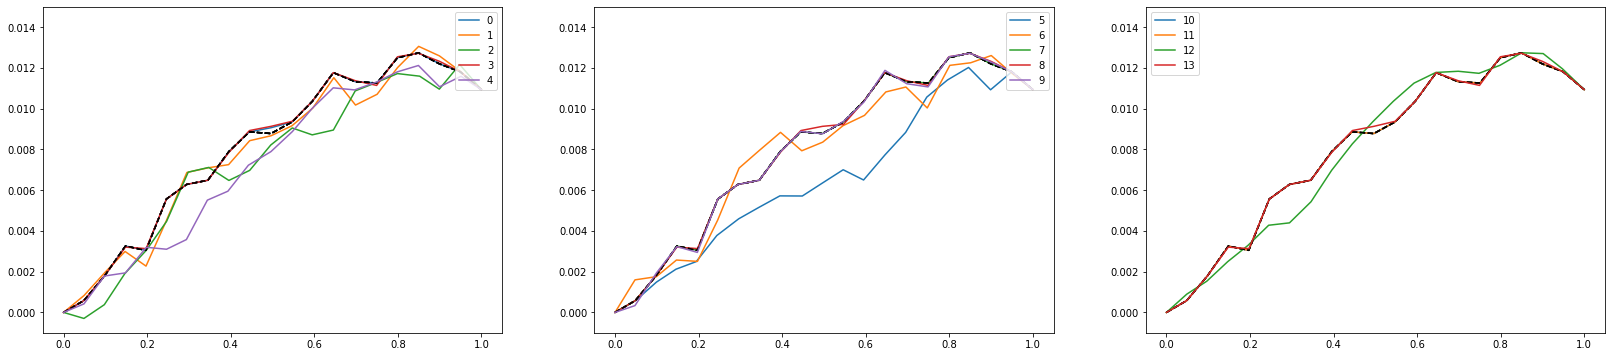

In [51]:
# 시각화 1


fig, axes = plt.subplots(nrows=1, ncols = 3, figsize = (28, 6))


# base는 따로 빼고 그려줘
for i in range(len( uplift_model_22_30 )-1 ):
    if i < 5 :
        # base
        axes[0].plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , color='black', linestyle='dashed')
        # 후보모델
        axes[0].plot(uplift_model_22_30[i].test_results_.aqini_x,  uplift_model_22_30[i].test_results_.aqini_y , label = i )
    elif i < 10 :
        # base
        axes[1].plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , color='black', linestyle='dashed' )
        # 후보모델
        axes[1].plot(uplift_model_22_30[i].test_results_.aqini_x,  uplift_model_22_30[i].test_results_.aqini_y , label = i )
    else:
        # base
        axes[2].plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , color='black', linestyle='dashed' )
        # 후보모델
        axes[2].plot(uplift_model_22_30[i].test_results_.aqini_x,  uplift_model_22_30[i].test_results_.aqini_y , label = i )
        
axes[0].set_ylim(-0.001, 0.015)
axes[0].legend(loc="upper right")
axes[1].set_ylim(-0.001, 0.015)
axes[1].legend(loc="upper right")
axes[2].set_ylim(-0.001, 0.015)
axes[2].legend(loc="upper right")


plt.legend()
plt.show()
plt.close()

In [52]:
cate_step2

['buy_amount_avg_all_seg',
 'rgt_elapsed_days_seg',
 'visit_gubn',
 'text_mail_wemakepay_bool',
 'birth',
 'push_yn',
 'mail_yn',
 'buying_trend_group',
 'wmp_pay_yn',
 'last_buy_platform',
 'ad_uv_yn',
 'text_yn',
 'last_buy_seg',
 'text_mail_wemakepay']

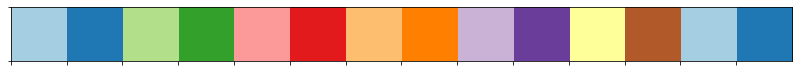

In [53]:
sns.palplot(sns.color_palette("Paired", 14))

In [54]:
cmap = sns.color_palette("Paired", 14)

In [55]:
len(cmap)

14

In [56]:
cmap[0]

(0.6509803921568628, 0.807843137254902, 0.8901960784313725)

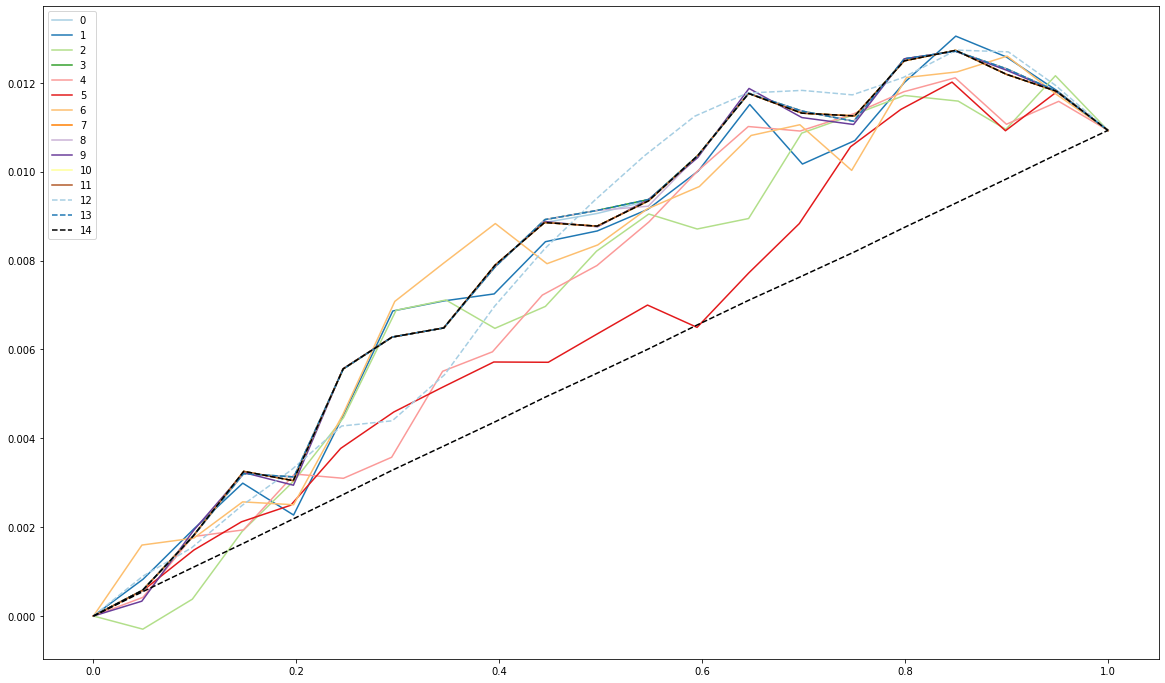

In [57]:
plt.figure(figsize = (20, 12))

for i in range(len(uplift_model_22_30)):    
    if i == 14:
        # 마지막이라면, base 모델 그려주고
        plt.plot(uplift_model_base.test_results_.aqini_x,  uplift_model_base.test_results_.aqini_y , label = i, color = 'black', linestyle='dashed' )
        plt.plot(uplift_model_22_30[i].test_results_.aqini_x,  [uplift_model_22_30[i].test_results_.aqini_y[-1]/20*x for x in range(20+1)], color='black', linestyle='dashed')
    
    elif i == 12 or i == 13:
        plt.plot(uplift_model_22_30[i].test_results_.aqini_x,  uplift_model_22_30[i].test_results_.aqini_y , label = i, color = cmap[i], linestyle='dashed')
    else:
        plt.plot(uplift_model_22_30[i].test_results_.aqini_x,  uplift_model_22_30[i].test_results_.aqini_y , label = i, color = cmap[i])

plt.legend()
plt.show()
plt.close()

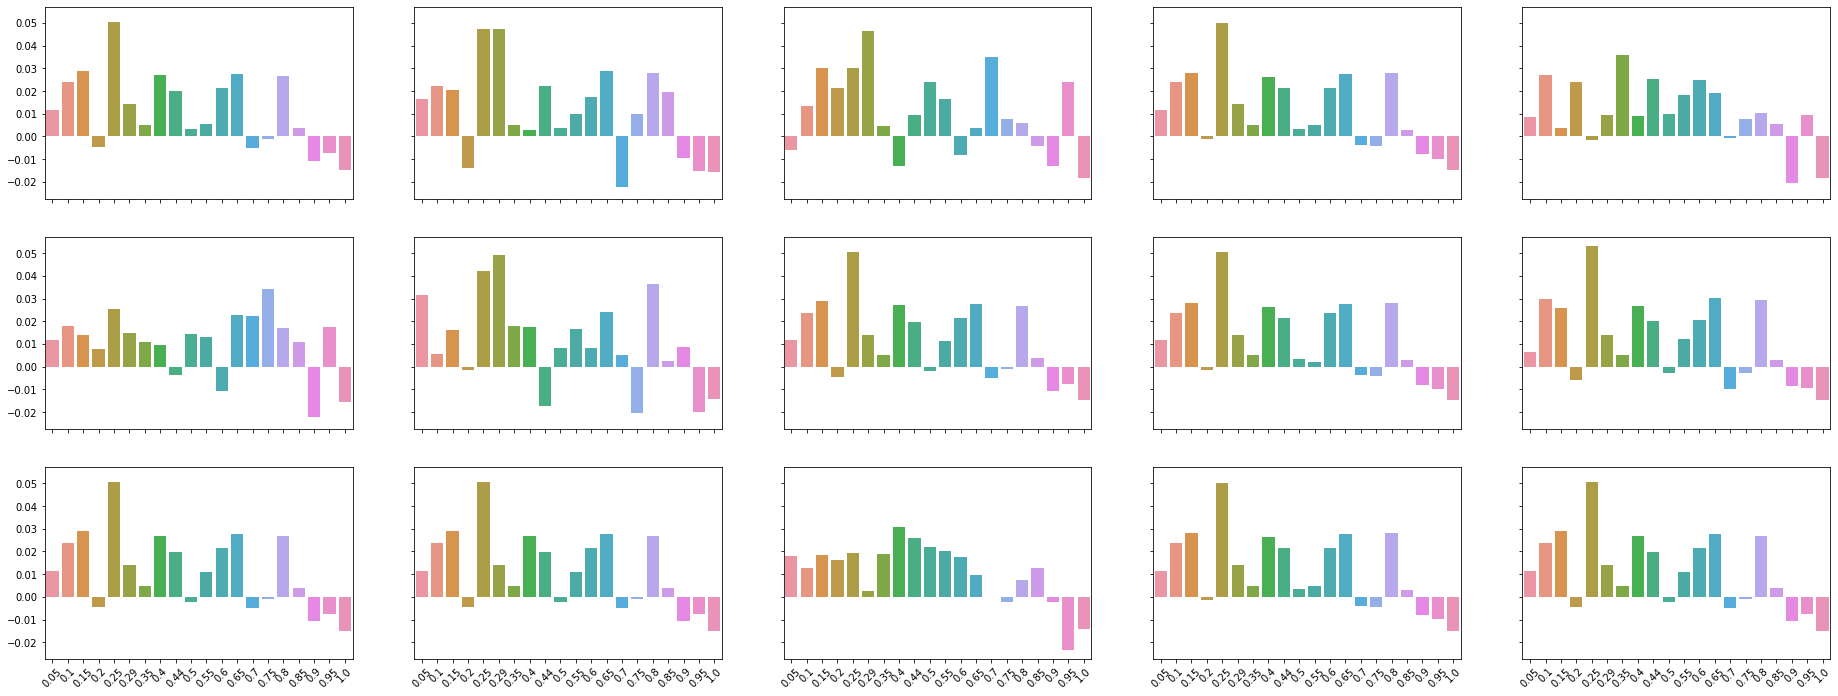

In [58]:
# 후보 35
fig, axes = plt.subplots(nrows = 3, ncols = 5, sharey = True, sharex=True, figsize = (32, 12))

axes = axes.flatten()

for i in range(len(uplift_model_22_30) ):
    if i == len(uplift_model_22_30): # 마지막에 base 그려준다
        sns.barplot(np.around(uplift_model_base.test_results_.uplift_x, 2), uplift_model_base.test_results_.uplift_y, ax = axes[i])
    else:
        sns.barplot(np.around(uplift_model_22_30[i].test_results_.uplift_x, 2), uplift_model_22_30[i].test_results_.uplift_y, ax = axes[i])

for ax in axes:
    ax.tick_params('x', labelrotation=45)
plt.show()
plt.close()

---

### ### q1_aqini

In [59]:
cate_step2

['buy_amount_avg_all_seg',
 'rgt_elapsed_days_seg',
 'visit_gubn',
 'text_mail_wemakepay_bool',
 'birth',
 'push_yn',
 'mail_yn',
 'buying_trend_group',
 'wmp_pay_yn',
 'last_buy_platform',
 'ad_uv_yn',
 'text_yn',
 'last_buy_seg',
 'text_mail_wemakepay']

In [60]:
# base
uplift_model_base.test_results_.q1_aqini

0.039890501593537714

In [61]:
# 7이 곧 base다
for i in range(len(uplift_model_22_30)):
    print( '{} :'.format(i), uplift_model_22_30[i].test_results_.q1_aqini )

0 : 0.03989087350452844
1 : 0.0357314268762022
2 : 0.026547300271266512
3 : 0.039920928763145756
4 : 0.026446223594282996
5 : 0.011888248270187583
6 : 0.03492576132021422
7 : 0.039890501593537714
8 : 0.03992500867386696
9 : 0.039853509693179
10 : 0.039890501593537714
11 : 0.039890501593537714
12 : 0.036029895557998064
13 : 0.039920928763145756
14 : 0.039890501593537714


----

### ### 상위 50%의 uplift 기준으로 평가

In [62]:
# 상위 50% 의 uplift 값의 합을 본다 - (조건)percentile 에 따라서 다른 가중치를 갖는다!

uplift_model_22_30_half_sum = {}
for i in range(len( uplift_model_22_30 )):
    uplift_model_22_30_half_sum[i] = np.sum( [up_*(10-i) for i,up_ in enumerate(uplift_model_22_30[i].test_results_.uplift_y[:10])] )
        

In [63]:
uplift_model_22_30_half_sum

{0: 1.047409557118048,
 1: 1.0289617717020352,
 2: 0.8878284726755209,
 3: 1.0608548768271908,
 4: 0.7933097019759167,
 5: 0.7473104623830026,
 6: 1.0820596208368536,
 7: 1.0421680053686175,
 8: 1.062985443469739,
 9: 1.030912206979753,
 10: 1.0421680053686175,
 11: 1.0421680053686175,
 12: 0.9270967582398054,
 13: 1.0608548768271908,
 14: 1.0421680053686175}

In [64]:
pd.DataFrame(index = uplift_model_22_30_half_sum.keys(), data = uplift_model_22_30_half_sum.values(), columns = ['half_sum'] ).sort_values(by='half_sum', ascending=False)

,half_sum
6,1.082060
8,1.062985
3,1.060855
13,1.060855
0,1.047410
7,1.042168
10,1.042168
11,1.042168
14,1.042168
9,1.030912


In [65]:
uplift_model_22_30_upresult = pd.DataFrame(index = uplift_model_22_30_half_sum.keys(), data = uplift_model_22_30_half_sum.values(), columns = ['half_sum'] )

In [66]:
uplift_model_22_30_upresult.sort_values(by='half_sum', ascending=False)

,half_sum
6,1.082060
8,1.062985
3,1.060855
13,1.060855
0,1.047410
7,1.042168
10,1.042168
11,1.042168
14,1.042168
9,1.030912


In [ ]:

half_sum
6	1.082060
8	1.062985
3	1.060855
13	1.060855
0	1.047410
7	1.042168
10	1.042168
11	1.042168
14	1.042168
9	1.030912
1	1.028962
12	0.927097
2	0.887828
4	0.793310
5	0.747310